# Results 5 June

There are two data tables in the analysis:  
- accuracies table contains the data for each trial (one row = one trial)  
- fixations table contains variables for each fixation in a given trial (one row = one fixation)
<br>
The two can be merged if only one row per trial is selected from the fixaions table

In [1]:
from tools import *
import pandas as pd
import seaborn as sns
from matplotlib import cm
from scipy.stats import ks_2samp
from IPython.display import display
style.use('ggplot')
d = manual_load_data('clean_data.pkl')
%config InlineBackend.figure_format = 'retina'

In [2]:
markers = {}
markers['P07'] = {'index': 'index8', 'thumb': 'thumb9', 'wrist': 'wrist11'}
markers['P08'] = {'index': 'index8', 'thumb': 'thumb9', 'wrist': 'wrist11'}
markers['P09'] = {'index': 'index7', 'thumb': 'thumb9', 'wrist': 'wrist11'}
markers['P11'] = {'index': 'index8', 'thumb': 'thumb9', 'wrist': 'wrist11'}
markers['P12'] = {'index': 'index8', 'thumb': 'thumb9', 'wrist': 'wrist11'}
markers['P16'] = {'index': 'index8', 'thumb': 'thumb9', 'wrist': 'wrist12'}
markers['P18'] = {'index': 'index8', 'thumb': 'thumb9', 'wrist': 'wrist11'}
markers['P19'] = {'index': 'index8', 'thumb': 'thumb9', 'wrist': 'wrist11'}
markers['P21'] = {'index': 'index7', 'thumb': 'thumb9', 'wrist': 'wrist11'}

pd.DataFrame(markers)

P07      P08      P09      P11      P12      P16      P18      P19  \
index   index8   index8   index7   index8   index8   index8   index8   index8   
thumb   thumb9   thumb9   thumb9   thumb9   thumb9   thumb9   thumb9   thumb9   
wrist  wrist11  wrist11  wrist11  wrist11  wrist11  wrist12  wrist11  wrist11   

           P21  
index   index7  
thumb   thumb9  
wrist  wrist11

## Distance to object's centre for index & gaze

In [3]:
accuracies = pd.DataFrame()

for pid, subj in d.items():
    
    index_x = markers[pid]['index'] + 'x'
    wrist_vel = markers[pid]['wrist'] + 'vel'
    
    for tid, trial in subj['trials'].items():
        
        # identify the reach onset frame
        sm = np.array(trial['startmovement'])
        ro_frame = np.where(sm == 1)[0][0]
        
        # get the fixations table for a trial
        fix = pd.DataFrame(trial['fix'])
                
        # find the eye and index to object distances
        index_object = trial[index_x][-1] - trial['objectx'][-1]
        eyes_object_final = fix.iloc[-1]['centre_x'] - trial['objectx'][-1] # final fixation in a trial
        
        ro_fix = fix[(fix['start_frame'] <= ro_frame) & (fix['end_frame'] >= ro_frame)]
        
        if not ro_fix['centre_x'].any():
            ro_fix_x = fix[fix['start_frame'] >= ro_frame]['centre_x'].iloc[0]
        else:
            ro_fix_x = ro_fix['centre_x'].iloc[0]
            
        eyes_object_ro = ro_fix_x - trial['objectx'][ro_frame]
        
        if 'RightToLeft' in trial['name']:
            index_object *= -1
            eyes_object_final *= -1
            eyes_object_ro *= -1
            
        # reach duration in frames
        reach_duration = len(np.where(sm == 1)[0])
        
        # peak velocity frame
        vel = np.array(trial[wrist_vel])
        peak_vel = np.where(vel == max(vel))[0][0]
        
        # wrist deceleration time in frames
        wrist_decel = len(vel[peak_vel:])
        
        # reaction time: reach initiation frame - tone frame (880 is when the tone starts to play)
        reaction = ro_frame - 880
            
        cond = trial['name'][6:-4]
        
        to_add = pd.Series()
        to_add['p'] = pid
        to_add['condition'] = cond
        to_add['trial'] = tid
        to_add['ro_frame'] = ro_frame
        to_add['reach_duration'] = reach_duration
        to_add['peak_vel'] = peak_vel
        to_add['wrist_decel'] = wrist_decel
        to_add['reaction'] = reaction
        to_add['index_object'] = index_object
        to_add['eyes_object_final'] = eyes_object_final
        to_add['eyes_object_ro'] = eyes_object_ro

        
        accuracies = accuracies.append(to_add, ignore_index = True)

In [4]:
accuracies[accuracies['p'] == 'P11'].sort_values(by = 'condition')

condition  eyes_object_final  eyes_object_ro  \
26    Occlusion_Cue_LeftToRight          -0.043045       -0.008489   
28    Occlusion_Cue_LeftToRight          -0.050904       -0.010312   
29    Occlusion_Cue_LeftToRight          -0.048320       -0.012685   
30    Occlusion_Cue_LeftToRight          -0.052034       -0.022108   
31    Occlusion_Cue_LeftToRight          -0.053332       -0.014381   
24    Occlusion_Cue_RightToLeft          -0.064803       -0.033644   
35    Occlusion_Cue_RightToLeft          -0.027019       -0.023037   
13    Occlusion_Cue_RightToLeft          -0.041178        0.010860   
12    Occlusion_Cue_RightToLeft          -0.042300       -0.000159   
25    Occlusion_Cue_RightToLeft          -0.057467       -0.035653   
19  Occlusion_NoCue_LeftToRight          -0.077537       -0.021095   
11  Occlusion_NoCue_LeftToRight          -0.002463        0.016198   
9   Occlusion_NoCue_LeftToRight          -0.066669       -0.057016   
10  Occlusion_NoCue_LeftToRight          -0.056963       -0.018644   
32  Occlusion_NoCue_RightToLeft          -0.053469       -0.030447   
36  Occlusion_NoCue_RightToLeft          -0.031038       -0.024863   
37  Occlusion_NoCue_RightToLeft          -0.046030       -0.035807   
38  Occlusion_NoCue_RightToLeft          -0.037905       -0.003492   
39  Occlusion_NoCue_RightToLeft          -0.033325       -0.025859   
41  Occlusion_NoCue_RightToLeft          -0.080632       -0.052788   
34      Visible_Cue_LeftToRight          -0.008988        0.004748   
33      Visible_Cue_LeftToRight          -0.021426        0.000153   
40      Visible_Cue_LeftToRight          -0.004502        0.004327   
21      Visible_Cue_LeftToRight          -0.011292        0.006847   
43      Visible_Cue_LeftToRight          -0.012073        0.009785   
42      Visible_Cue_LeftToRight          -0.023915        0.009832   
22      Visible_Cue_RightToLeft          -0.009357       -0.012369   
27      Visible_Cue_RightToLeft          -0.016353       -0.003795   
20      Visible_Cue_RightToLeft          -0.010173       -0.018418   
18      Visible_Cue_RightToLeft          -0.013949       -0.018769   
17      Visible_Cue_RightToLeft          -0.012784        0.000404   
15      Visible_Cue_RightToLeft          -0.021273       -0.001453   
16    Visible_NoCue_LeftToRight          -0.010696        0.004665   
14    Visible_NoCue_LeftToRight          -0.013003        0.015319   
23    Visible_NoCue_LeftToRight          -0.006905        0.015189   
2     Visible_NoCue_LeftToRight          -0.021984        0.011599   
3     Visible_NoCue_LeftToRight          -0.008641        0.002684   
4     Visible_NoCue_LeftToRight          -0.020245        0.010395   
1     Visible_NoCue_RightToLeft          -0.010603        0.003296   
8     Visible_NoCue_RightToLeft          -0.012022       -0.007653   
6     Visible_NoCue_RightToLeft          -0.013534       -0.000478   
7     Visible_NoCue_RightToLeft          -0.016877       -0.006594   
5     Visible_NoCue_RightToLeft          -0.024039       -0.015478   
0     Visible_NoCue_RightToLeft          -0.003787        0.016812   

    index_object    p  peak_vel  reach_duration  reaction  ro_frame trial  \
26     -0.056773  P11     948.0            67.0      40.0     920.0    t6   
28     -0.064723  P11     950.0            68.0      41.0     921.0    t4   
29     -0.050621  P11     953.0            70.0      46.0     926.0    t5   
30     -0.063472  P11     962.0            77.0      50.0     930.0    t2   
31     -0.061573  P11     949.0            69.0      44.0     924.0    t3   
24     -0.060382  P11     955.0            71.0      52.0     932.0    t8   
35     -0.023688  P11     959.0            91.0      51.0     931.0    t7   
13     -0.032229  P11     959.0            80.0      48.0     928.0   t12   
12     -0.043283  P11     966.0            82.0      57.0     937.0   t11   
25     -0.044897  P11     971.0            72.0      61.0     941.0    t9   
19     -0.085210  P11   

In [5]:
inter1 = accuracies.groupby(['p', 'condition']).aggregate(np.mean)
inter2 = inter1.reset_index(level = ['condition'])
meanPerCondition = inter2.groupby('condition').aggregate(np.mean)

meanPerCondition

eyes_object_final  eyes_object_ro  index_object  \
condition                                                                      
Occlusion_Cue_LeftToRight            -0.067942       -0.039012     -0.065096   
Occlusion_Cue_RightToLeft            -0.068200       -0.033656     -0.058328   
Occlusion_NoCue_LeftToRight          -0.071903       -0.043779     -0.069103   
Occlusion_NoCue_RightToLeft          -0.073167       -0.032318     -0.065223   
Visible_Cue_LeftToRight              -0.021837       -0.002234     -0.012494   
Visible_Cue_RightToLeft              -0.009013        0.006300     -0.003909   
Visible_NoCue_LeftToRight            -0.029047       -0.003561     -0.011473   
Visible_NoCue_RightToLeft            -0.009637        0.006537     -0.003521   

                               peak_vel  reach_duration   reaction  \
condition                                                            
Occlusion_Cue_LeftToRight    956.438889       75.581481  43.816667   
Occlusion_Cue_RightToLeft    964.098148       88.122222  48.950000   
Occlusion_NoCue_LeftToRight  955.340741       74.837037  42.475926   
Occlusion_NoCue_RightToLeft  959.114815       85.307407  47.888889   
Visible_Cue_LeftToRight      949.909259       72.977778  38.475926   
Visible_Cue_RightToLeft      959.392593       82.003704  44.388889   
Visible_NoCue_LeftToRight    949.474074       70.729630  39.096296   
Visible_NoCue_RightToLeft    959.420370       83.090741  44.192593   

                               ro_frame  wrist_decel  
condition                                             
Occlusion_Cue_LeftToRight    923.816667    43.101852  
Occlusion_Cue_RightToLeft    928.950000    53.612963  
Occlusion_NoCue_LeftToRight  922.475926    42.172222  
Occlusion_NoCue_RightToLeft  927.888889    54.385185  
Visible_Cue_LeftToRight      918.475926    41.618519  
Visible_Cue_RightToLeft      924.388889    47.000000  
Visible_NoCue_LeftToRight    919.096296    40.425926  
Visible_NoCue_RightToLeft    924.192593    47.940741

In [6]:
inter3 = inter1.reset_index(level = ['p', 'condition'])
anovaTable = inter3.pivot(index = 'p', columns = 'condition', values = 'index_object')

### Accuracy per condition

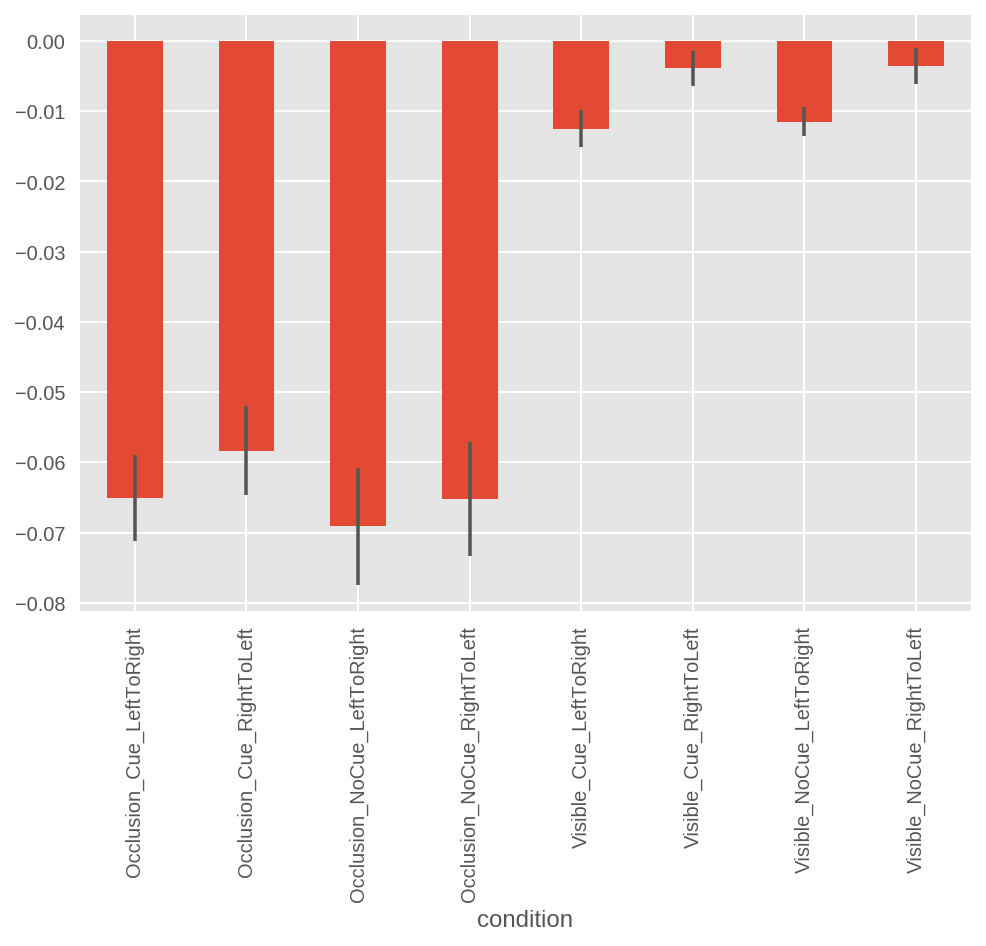

In [7]:
anovaTable.mean(axis = 0).plot(kind = 'bar', yerr = anovaTable.std(axis = 0) / np.sqrt(len(anovaTable)))
plt.show()

### Accuracy per participant

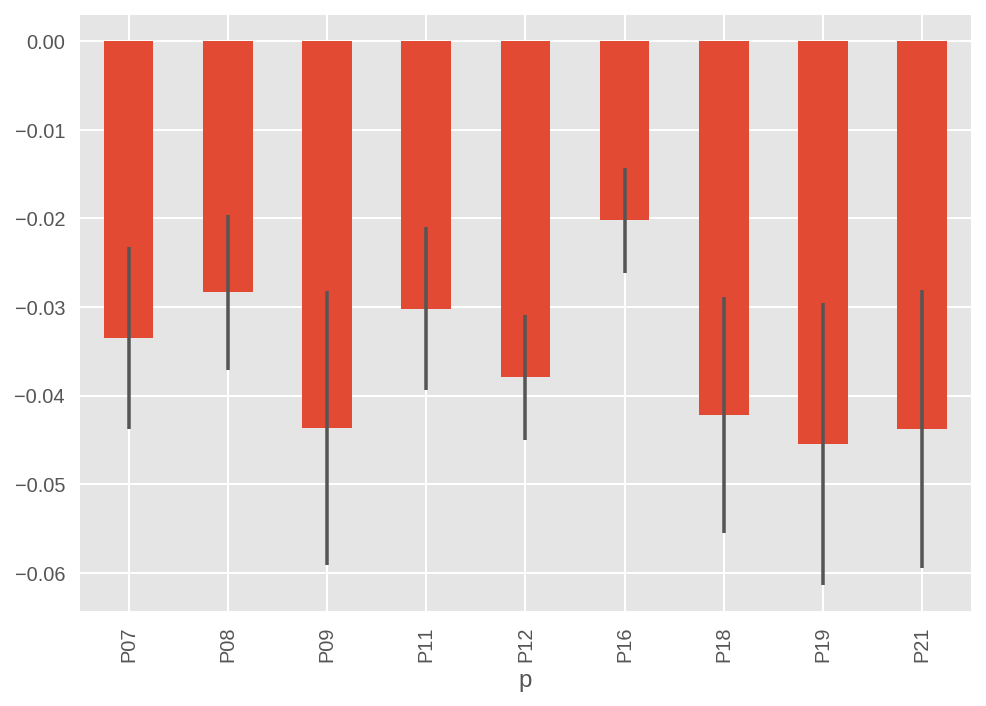

In [8]:
anovaTable.mean(axis = 1).plot(kind = 'bar', yerr = anovaTable.std(axis = 1) / np.sqrt(len(anovaTable.columns)))
plt.show()

## Fixations

In [9]:
cues = [0.353 + n * 0.072 for n in range(8)]
print cues

[0.353, 0.425, 0.497, 0.569, 0.641, 0.713, 0.7849999999999999, 0.857]


In [10]:
# Create a common fixations table

fixations = pd.DataFrame()

for pid, subj in d.items():
    
    index_x = markers[pid]['index'] + 'x'

    for tid, trial in subj['trials'].items():
        
        to_add = pd.DataFrame(trial['fix'])
        
        # identify the reach onset frame
        sm = trial['startmovement']
        ro_frame = np.where(np.array(sm) == 1)[0][0]
                        
        # identify the last fixation in a trial (or just the last row)
        to_add['time_interval'] = None
        to_add.loc[to_add.index[-1], 'time_interval'] = 3
        
        # add the data
        to_add['p'] = pid
        to_add['condition'] = trial['name'][6:-4]
        to_add['trial'] = tid
        to_add['ro_frame'] = ro_frame
        
        # remove the dispersion column
        to_add.drop('dispersion', axis = 1, inplace = True)
 
        fixations = fixations.append(to_add, ignore_index = True)


In [11]:
# Determine the time interval 
# 0 = before occlusion. frames 0-495
# 1 = visual pursuit. frames 496 - reach onset
# 2 = reach onset - time of contact-1
# 3 = time of contact

time_interval = []

for index, row in fixations.iterrows():
    if row['time_interval'] == 3:
        time_interval.append(3)
        continue
    elif row['start_frame'] <= 495:
        time_interval.append(0)
    elif 495 < row['start_frame'] < row['ro_frame']:
        time_interval.append(1)
    elif row['start_frame'] >= row['ro_frame']:
        time_interval.append(2)

fixations['time_interval'] = time_interval

In [12]:
# Detect the off-screen outliers

fixations['off_screen'] = (fixations.centre_x < 0.34) | (fixations.centre_x > 0.87) | \
    (fixations.centre_z < 0.18) | (fixations.centre_z > 0.48)
    
fixations['off_screen'].value_counts()

False    12670
True        58
Name: off_screen, dtype: int64

In [13]:
# Find the distances between fixations and the closest cue

closest_cue = []
distance = []

for index, row in fixations.iterrows():
    dist = [row['centre_x'] - cue for cue in cues]
    ind, = np.where(np.abs(dist) == min(np.abs(dist)))
    closest_cue.append(ind[0])
    distance.append(dist[ind[0]])
    
fixations['closest_cue'] = closest_cue
fixations['distance_to'] = distance



In [14]:
fixations = fixations[['p', 'condition', 'trial', 'centre_x', 'centre_z', 'start_frame', 'end_frame', 'duration',
                       'ro_frame', 'time_interval', 'off_screen', 'closest_cue', 'distance_to']]
fixations.head()

p                  condition trial  centre_x  centre_z  start_frame  \
0  P11  Visible_NoCue_RightToLeft   t48  0.620333  0.316477           21   
1  P11  Visible_NoCue_RightToLeft   t48  0.782368  0.313448           55   
2  P11  Visible_NoCue_RightToLeft   t48  0.818304  0.321310           77   
3  P11  Visible_NoCue_RightToLeft   t48  0.819878  0.321702           94   
4  P11  Visible_NoCue_RightToLeft   t48  0.824741  0.326223          110   

   end_frame  duration  ro_frame  time_interval off_screen  closest_cue  \
0         44  0.184615       934              0      False            4   
1         74  0.153846       934              0      False            6   
2         93  0.130769       934              0      False            6   
3        109  0.123077       934              0      False            6   
4        135  0.200000       934              0      False            7   

   distance_to  
0    -0.020667  
1    -0.002632  
2     0.033305  
3     0.034878  
4    -0.032259

## Saccades

In [15]:
saccades = pd.DataFrame()

for pid, subj in d.items():
    for tid, trial in subj['trials'].items():
                
        to_add = pd.DataFrame()
        
        ro_frame = np.where(np.array(trial['startmovement']) == 1)[0][0]
        
        ti = [] # time interval
        for frame in trial['fix']['start_frame'][1:]:
            if frame < 495:
                ti.append(0)
            elif 495 <= frame < ro_frame:
                ti.append(1)
            elif frame >= ro_frame:
                ti.append(2)
        
        to_add['ampl'] = np.absolute(np.diff(trial['fix']['centre_x']))
        to_add['ro_frame'] = ro_frame
        to_add['time_interval'] = ti
        
        to_add['p'] = pid
        to_add['condition'] = trial['name'][6:-4]
        to_add['trial'] = tid
        
        saccades = saccades.append(to_add, ignore_index = True)

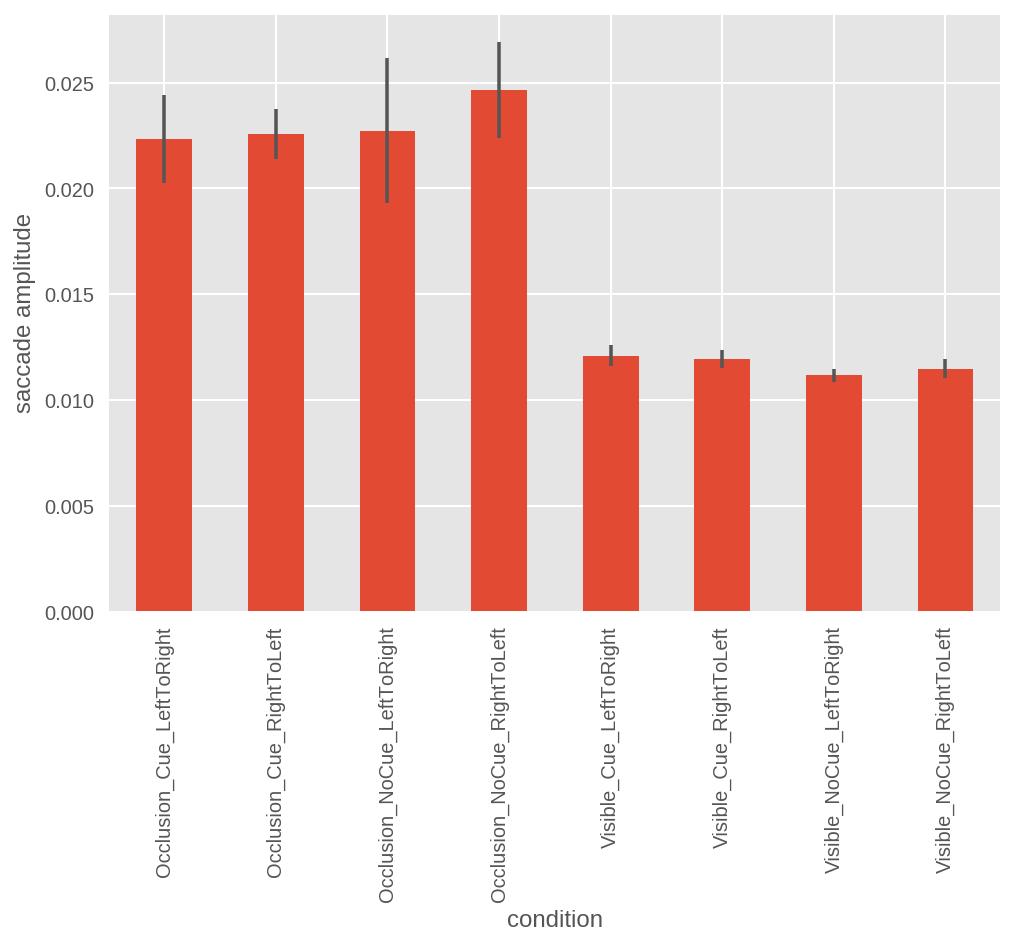

In [16]:
avgs = saccades[saccades.time_interval == 1] \
        .groupby(['p', 'condition'])['ampl'] \
        .apply(np.mean) \
        .reset_index() \
        .pivot(index = 'p', columns = 'condition', values = 'ampl')
        
avgs.apply(np.mean).plot(kind = 'bar', yerr = avgs.std() / np.sqrt(len(avgs)))
plt.ylabel('saccade amplitude')
plt.show()

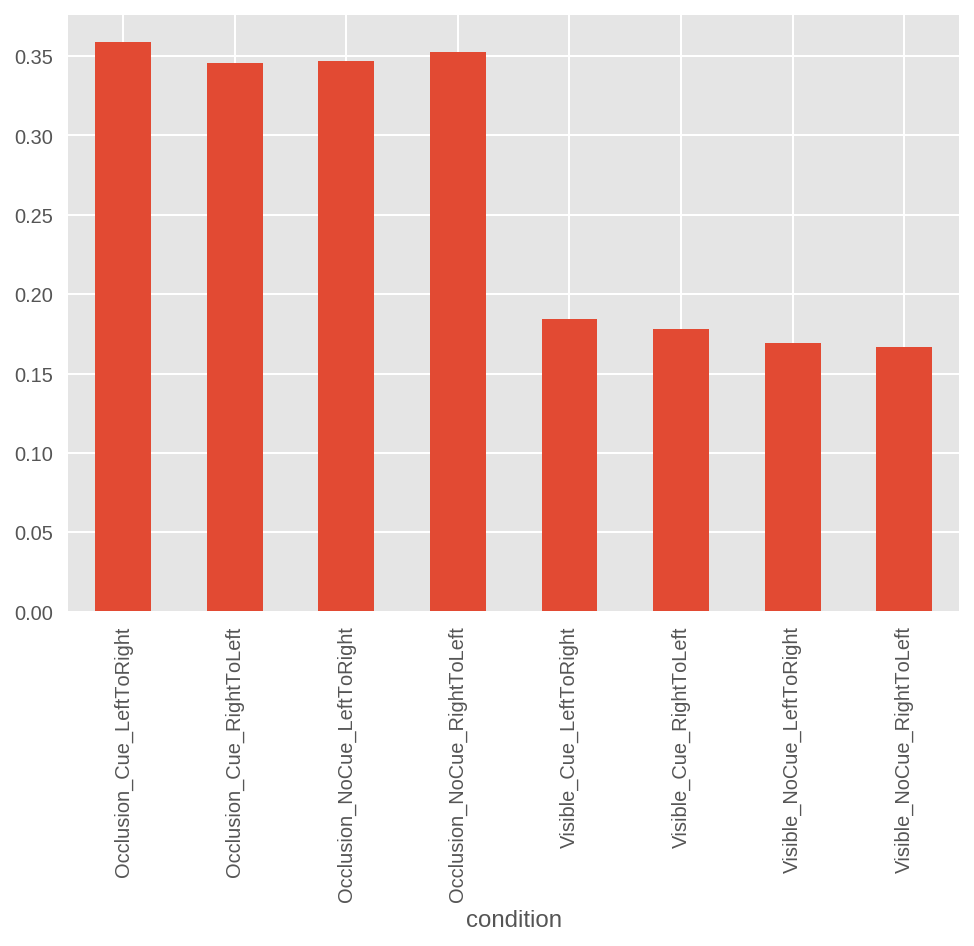

In [17]:
fixations[fixations.time_interval == 1] \
        .groupby(['p', 'condition'])['duration'] \
        .apply(np.mean) \
        .reset_index() \
        .pivot(index = 'p', columns = 'condition', values = 'duration') \
        .apply(np.mean) \
        .plot(kind = 'bar')
plt.show()

In [18]:
cues[1] - cues[0]

0.07200000000000001

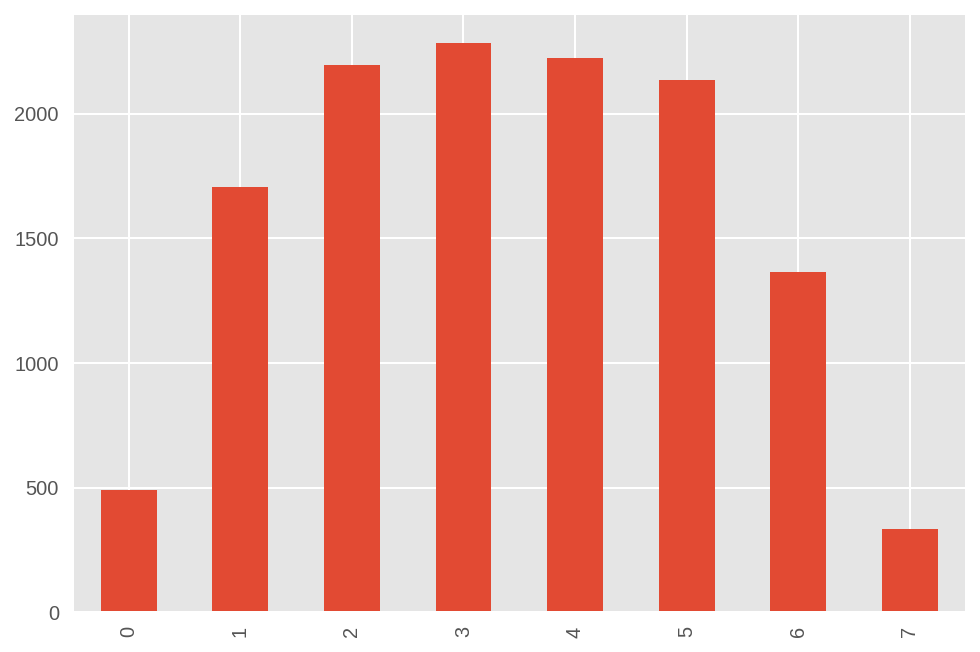

In [19]:
# Number of fixations per closest cue

fixations['closest_cue'].value_counts(sort = False).plot(kind = 'bar')
plt.show()

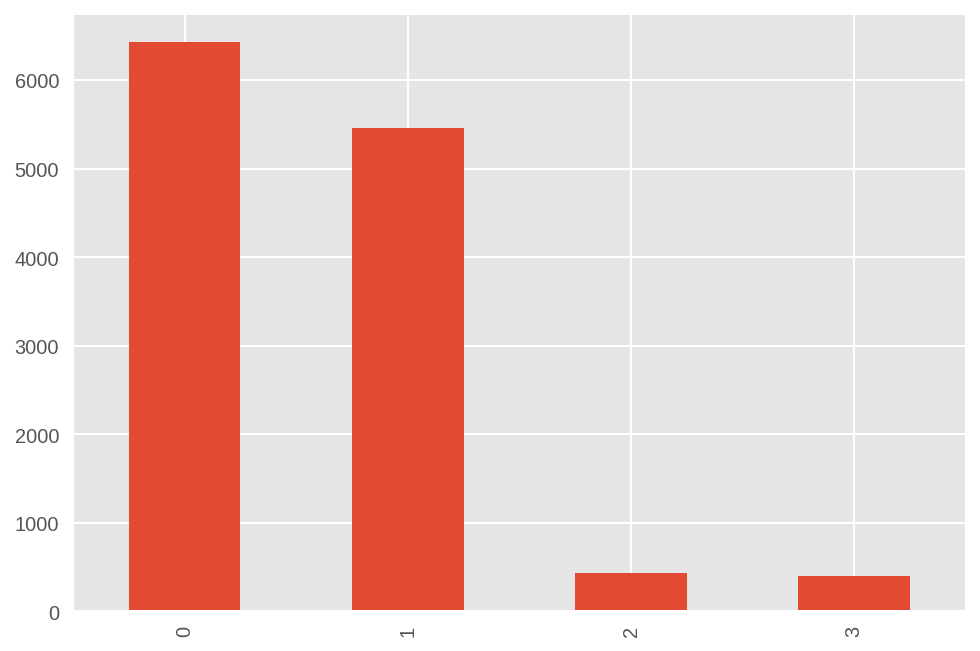

In [20]:
# Number of fixations in the time intervals

fixations['time_interval'].value_counts(sort = False).plot(kind = 'bar')
plt.show()

### Fixations' location during visual pursuit

In [21]:
# Fixations for occlusion, cue vs no cue, left to right


ocl_fixations = fixations[(fixations['condition'] == 'Occlusion_Cue_LeftToRight') & \
                          (fixations['off_screen'] == False) & \
                          (fixations['time_interval'] == 1)]


onl_fixations = fixations[(fixations['condition'] == 'Occlusion_NoCue_LeftToRight') & \
                          (fixations['off_screen'] == False) & \
                          (fixations['time_interval'] == 1)]


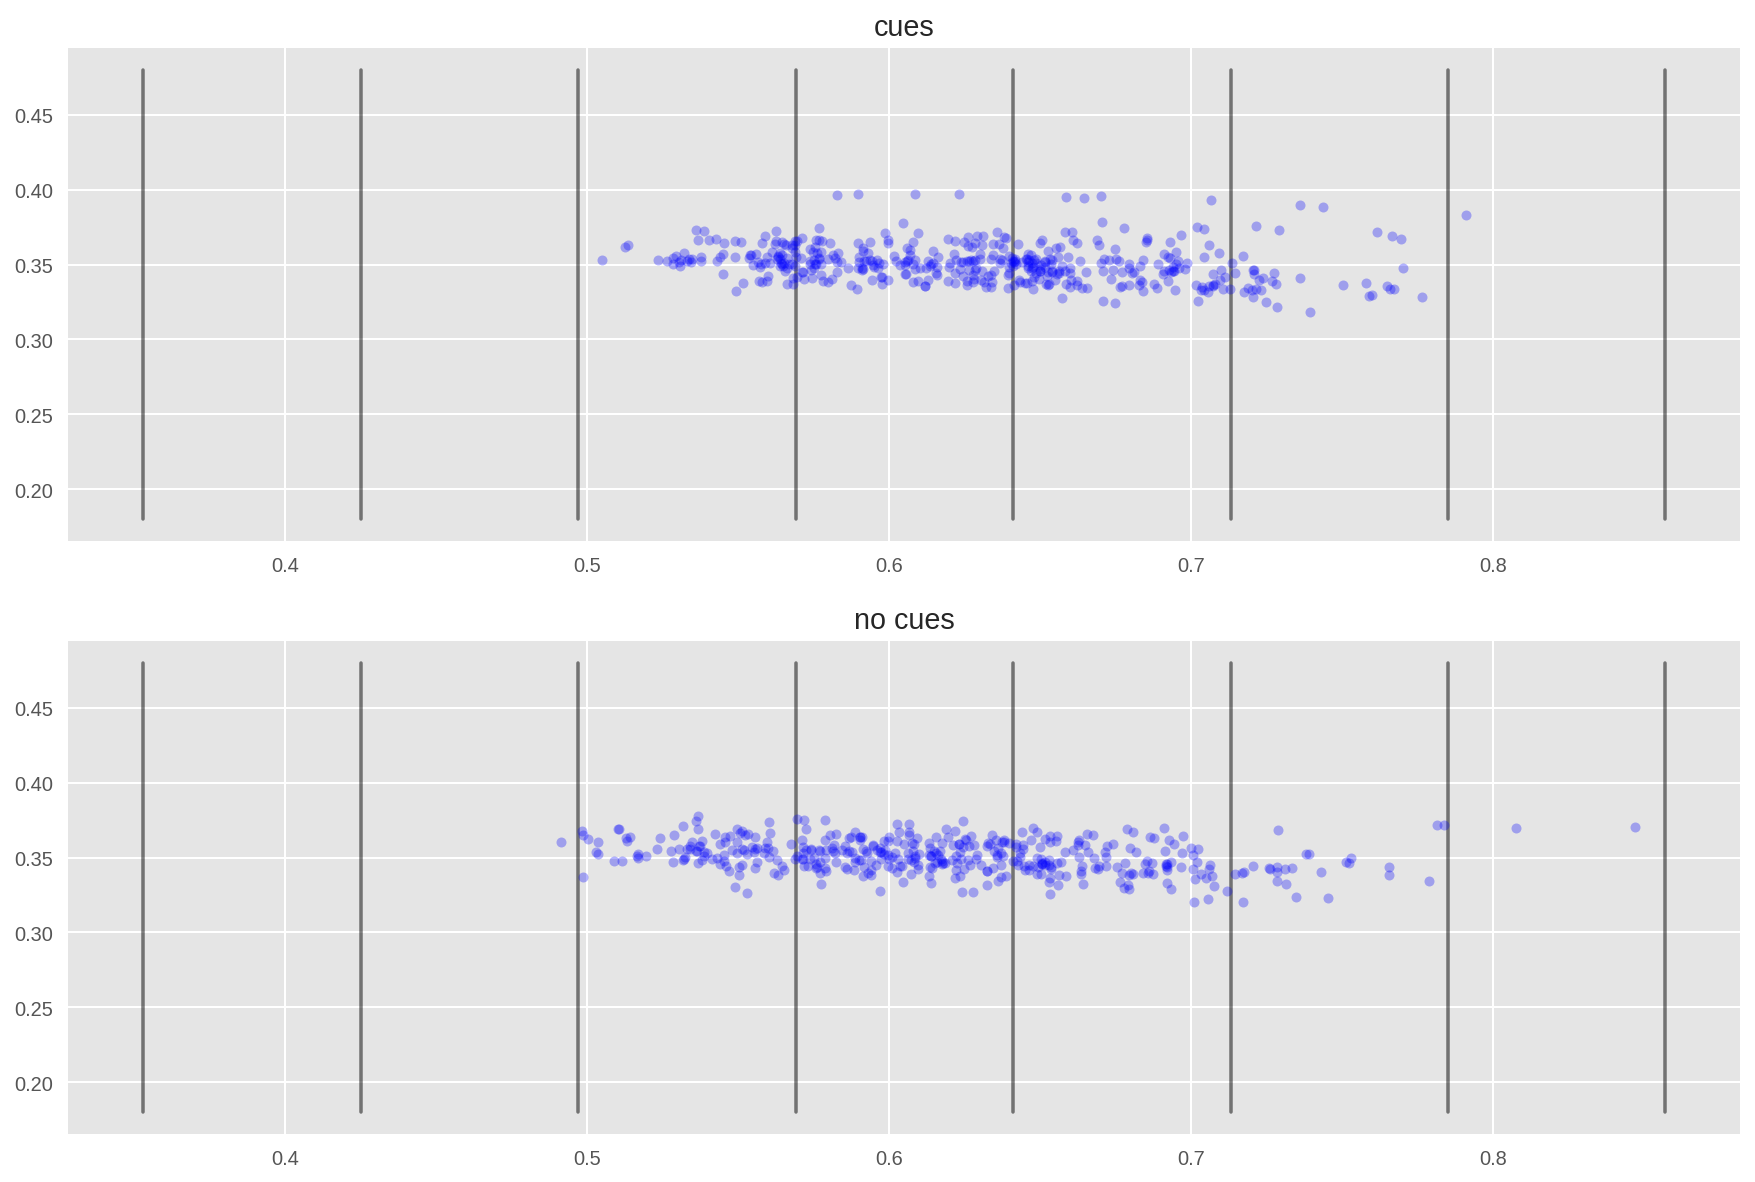

In [22]:
fig = plt.figure(figsize = [15, 10])
ax1 = fig.add_subplot(211)
draw_cues(ax1, ybottom = 0.18, ytop = 0.48)
ax1.plot(ocl_fixations['centre_x'], ocl_fixations['centre_z'], 'b.', alpha = 0.3, markersize = 10)
ax1.set_title('cues')

ax2 = fig.add_subplot(212)
draw_cues(ax2, ybottom = 0.18, ytop = 0.48)
ax2.plot(onl_fixations['centre_x'], onl_fixations['centre_z'], 'b.', alpha = 0.3, markersize = 10)
ax2.set_title('no cues')

plt.show()


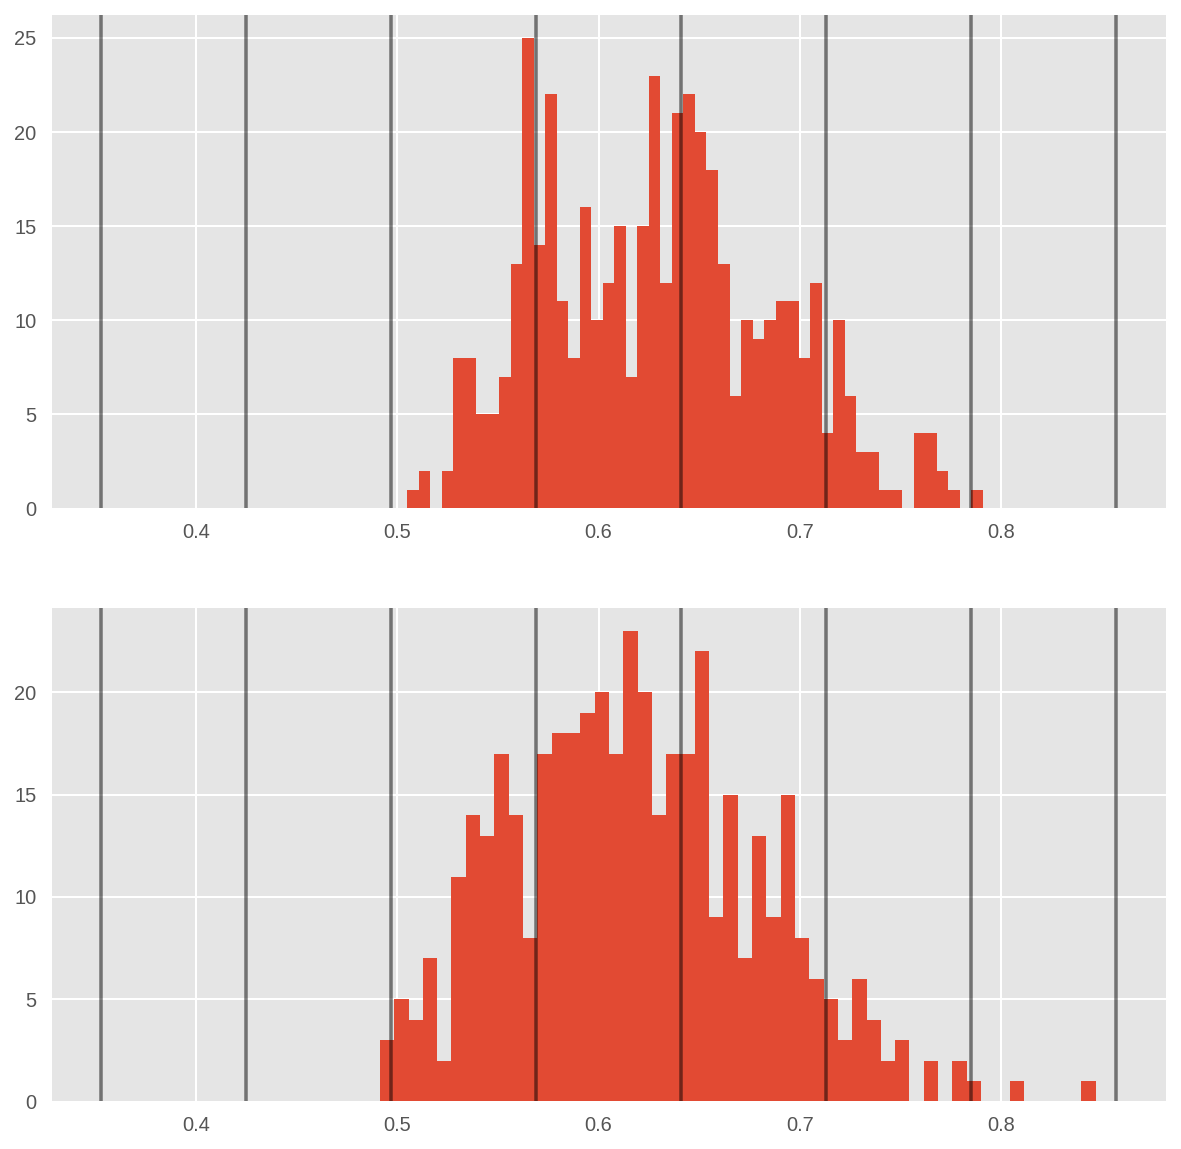

In [23]:
fig = plt.figure(figsize = [10, 10])
ax1 = fig.add_subplot(211)
ax1.hist(ocl_fixations['centre_x'], bins = 50)
draw_cues(ax1)

ax2 = fig.add_subplot(212, sharex = ax1)
ax2.hist(onl_fixations['centre_x'], bins = 50)
draw_cues(ax2)

plt.show()

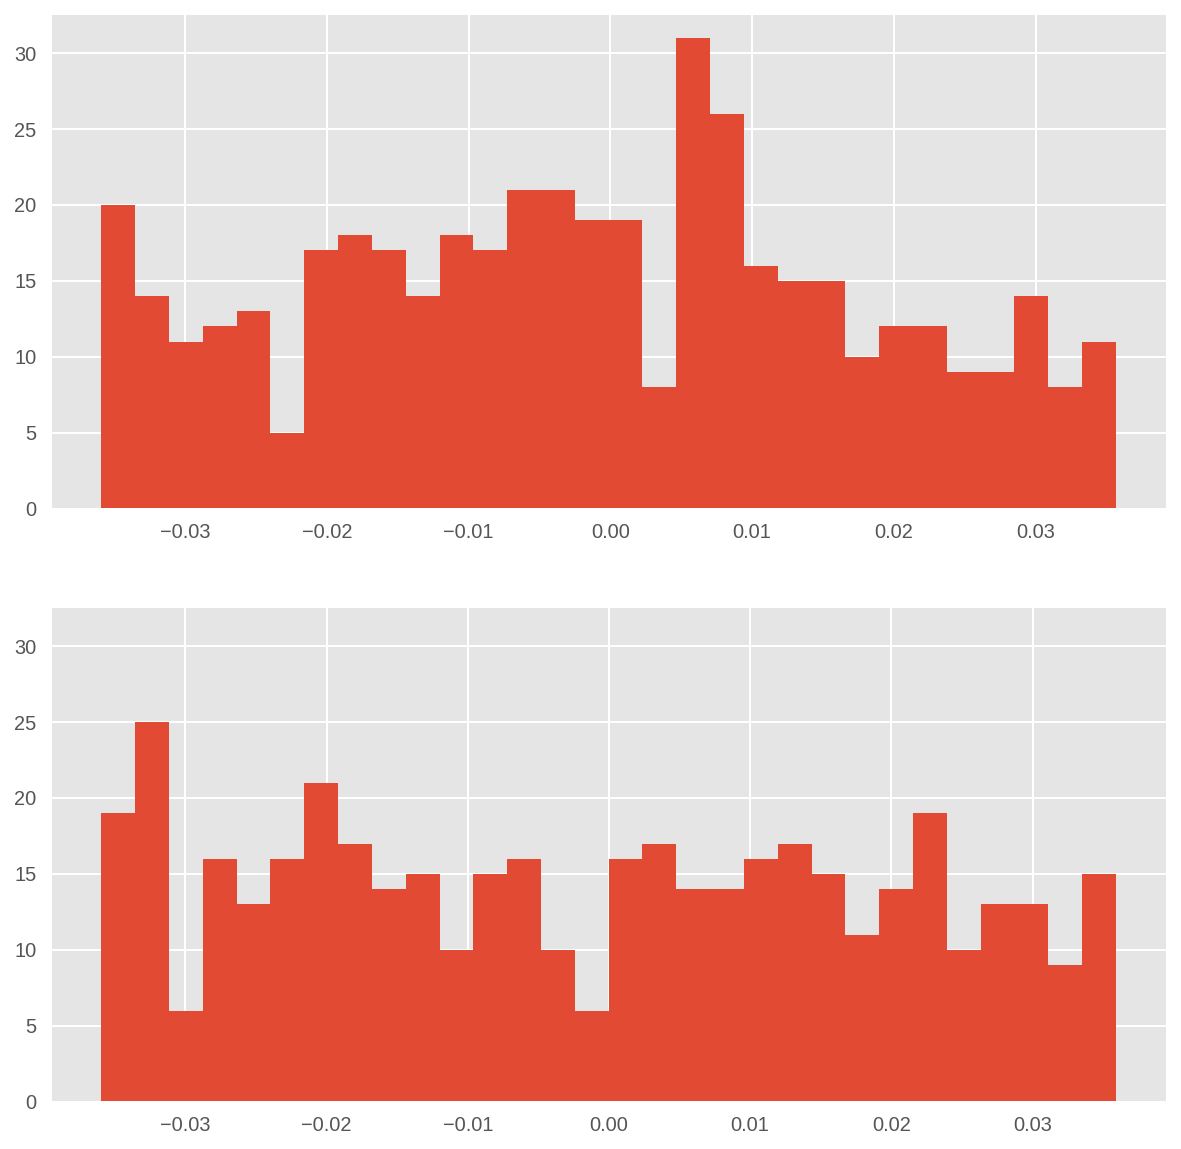

In [24]:
# Overlay the cues & plot the closest fixations. 0 = cue position

x1 = ocl_fixations['distance_to']
x2 = onl_fixations['distance_to']

fig = plt.figure(figsize = [10, 10])
ax1 = fig.add_subplot(211)
ax1.hist(x1, bins = 30)
ax2 = fig.add_subplot(212, sharey = ax1)
ax2.hist(x2, bins = 30)
plt.show()

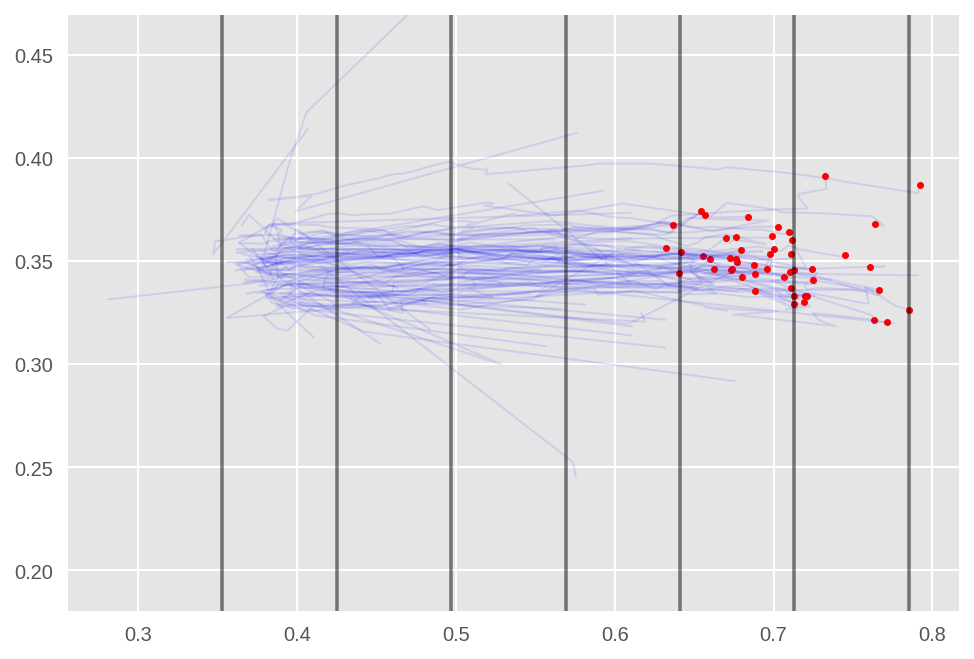

In [25]:

for subj in d.values():
    for trial in subj['trials'].values():
        if 'Occlusion_Cue_LeftToRight' in trial['name']:
            plt.plot(trial['fix']['centre_x'], trial['fix']['centre_z'], 'b-', alpha = 0.1, linewidth = 1)
            plt.plot(trial['fix']['centre_x'][-1], trial['fix']['centre_z'][-1], 'r.')

draw_cues(plt.gca(), ybottom = 0.18, ytop = 0.48)
plt.ylim(0.18, 0.47)
plt.show()

In [26]:
# Kolmogorov-Smirnov two-sample test for ocl vs onl

res = ks_2samp(x1, x2)
print 'ks = {}\np = {}'.format(round(res[0], 4), round(res[1], 4))

ks = 0.0811
p = 0.1039


### Fixations at the reach onset
- select the cue/nocue condition and the third time interval
- group by participant and trial id
- grab the first fixation's x and z coordinates
- merge the distance from gaze @ reach onset from the accuracies table

In [27]:
fix_ro_ocl = fixations[(fixations['condition'] == 'Occlusion_Cue_LeftToRight') & (fixations['time_interval'] == 3)] \
                    .groupby(['trial', 'p'])[['centre_x', 'centre_z']] \
                    .apply(lambda x: x.iloc[0]) \
                    .reset_index()
fix_ro_ocl = pd.merge(fix_ro_ocl, accuracies[['p', 'trial', 'eyes_object_ro']], on = ['p', 'trial'])

fix_ro_onl = fixations[(fixations['condition'] == 'Occlusion_NoCue_LeftToRight') & (fixations['time_interval'] == 3)] \
                    .groupby(['trial', 'p'])[['centre_x', 'centre_z']] \
                    .apply(lambda x: x.iloc[0]) \
                    .reset_index()
fix_ro_onl = pd.merge(fix_ro_onl, accuracies[['p', 'trial', 'eyes_object_ro']], on = ['p', 'trial'])

fix_ro_onl.head()

trial    p  centre_x  centre_z  eyes_object_ro
0   t13  P07  0.759230  0.354232        0.008044
1   t13  P08  0.713094  0.342430       -0.042591
2   t13  P12  0.675443  0.349682       -0.034145
3   t13  P16  0.775413  0.334699       -0.007337
4   t13  P18  0.685553  0.364964       -0.098069

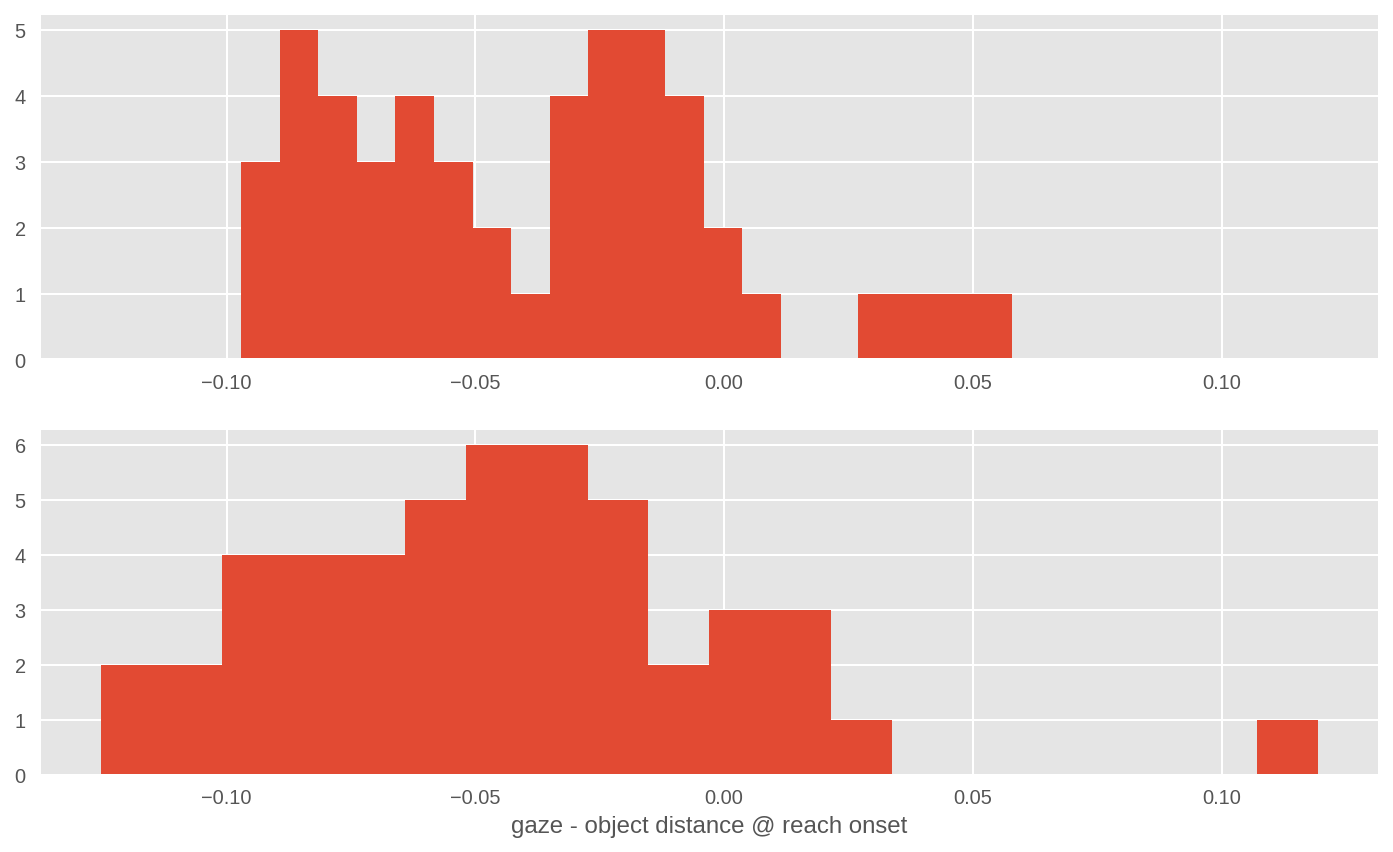

In [28]:
# Distribution of fixation-object distances at the reach onset

fig = plt.figure(figsize = (12, 7))

ax1 = fig.add_subplot(211)
ax1.hist(fix_ro_ocl['eyes_object_ro'], bins = 20)

ax2 = fig.add_subplot(212, sharex = ax1)
ax2.hist(fix_ro_onl['eyes_object_ro'], bins = 20)
ax2.set_xlabel('gaze - object distance @ reach onset')

plt.show()

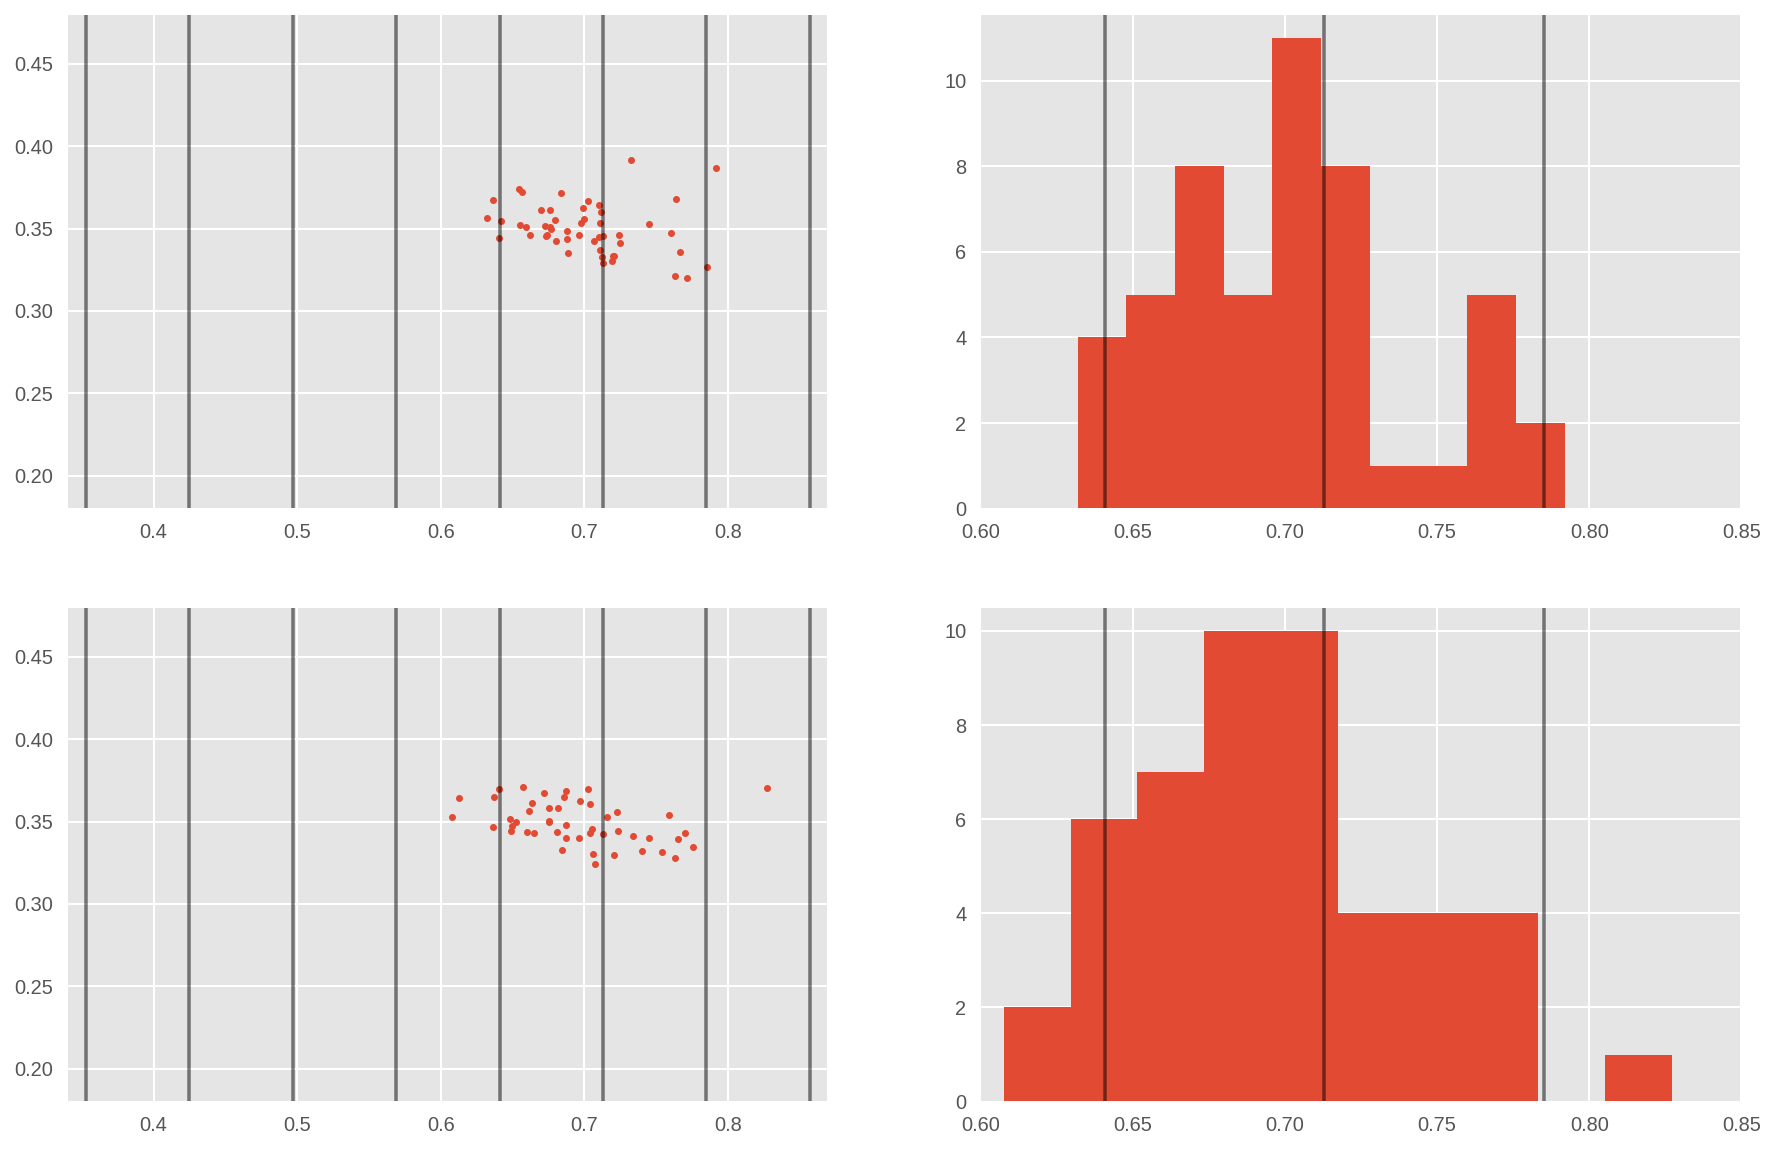

In [29]:
# Fixations at the reach onset relative to the screen

fig = plt.figure(figsize = (15, 10))

ax1 = fig.add_subplot(221)
ax1.plot(fix_ro_ocl.centre_x, fix_ro_ocl.centre_z, '.')
ax1.set_xlim(0.34, 0.87)
ax1.set_ylim(0.18, 0.48)
draw_cues(ax1)

ax2 = fig.add_subplot(222)
ax2.hist(fix_ro_ocl.centre_x)
draw_cues(ax2)
ax2.set_xlim(0.6, 0.85)

ax3 = fig.add_subplot(223)
ax3.plot(fix_ro_onl.centre_x, fix_ro_onl.centre_z, '.')
ax3.set_xlim(0.34, 0.87)
ax3.set_ylim(0.18, 0.48)
draw_cues(ax3)

ax4 = fig.add_subplot(224, sharex = ax2)
ax4.hist(fix_ro_onl.centre_x)
draw_cues(ax4)
ax4.set_xlim(0.6, 0.85)

plt.show()

### Fixations' location during reach

In [30]:
ocl_fix_reach = fixations[(fixations['condition'] == 'Occlusion_Cue_LeftToRight') & \
                          (fixations['off_screen'] == False) & \
                          (fixations['time_interval'] == 2)]

ocl_fix_final = fixations[(fixations['condition'] == 'Occlusion_Cue_LeftToRight') & \
                          (fixations['off_screen'] == False) & \
                          (fixations['time_interval'] == 3)]


onl_fix_reach = fixations[(fixations['condition'] == 'Occlusion_NoCue_LeftToRight') & \
                          (fixations['off_screen'] == False) & \
                          (fixations['time_interval'] == 2)]

onl_fix_final = fixations[(fixations['condition'] == 'Occlusion_NoCue_LeftToRight') & \
                          (fixations['off_screen'] == False) & \
                          (fixations['time_interval'] == 3)]

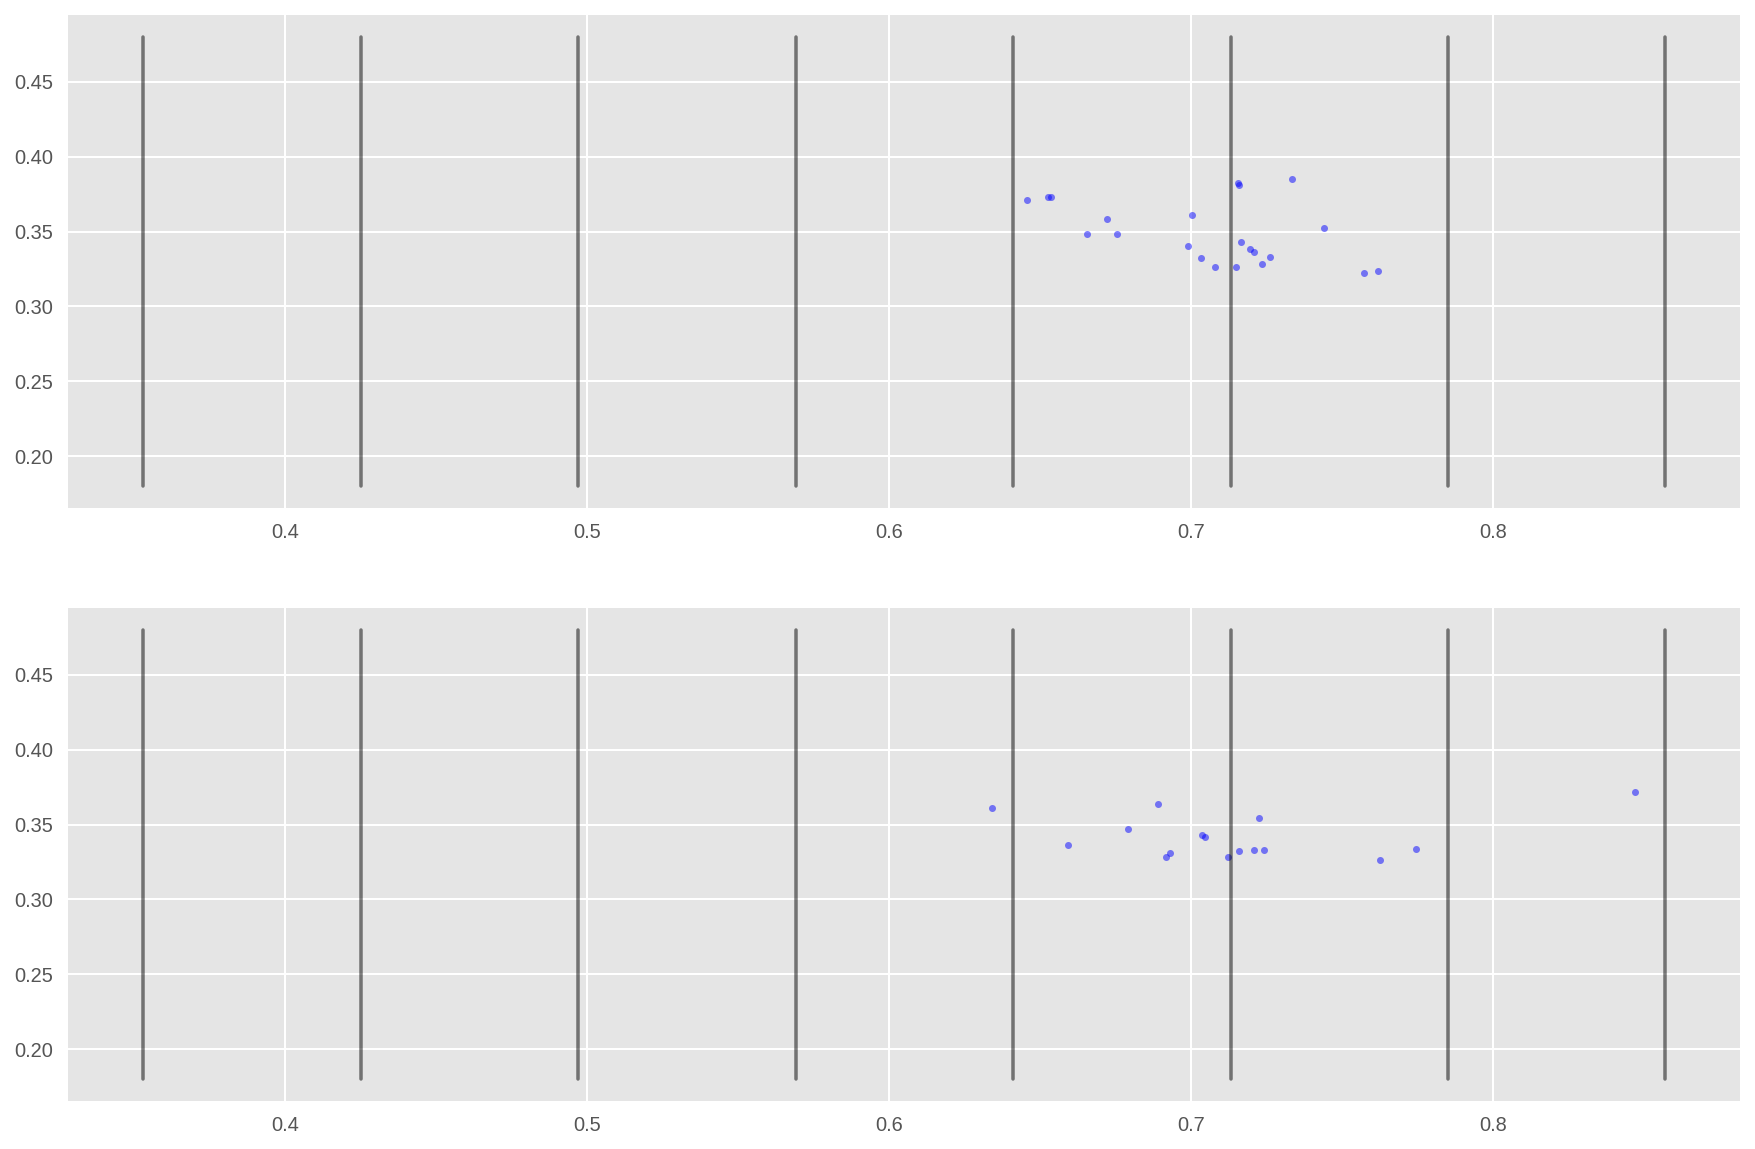

In [31]:
# Fixations after the reach onset

fig = plt.figure(figsize = [15, 10])

ax1 = fig.add_subplot(211)
ax1.plot(ocl_fix_reach['centre_x'], ocl_fix_reach['centre_z'], 'b.', alpha = 0.5)
draw_cues(ax1, ybottom = 0.18, ytop = 0.48)
ax1.set_xlim(0.34, 0.87)
ax1.set_ylim(0.18, 0.48)

ax2 = fig.add_subplot(212, sharex = ax1, sharey = ax1)
ax2.plot(onl_fix_reach['centre_x'], onl_fix_reach['centre_z'], 'b.', alpha = 0.5)
draw_cues(ax2, ybottom = 0.18, ytop = 0.48)

plt.show()

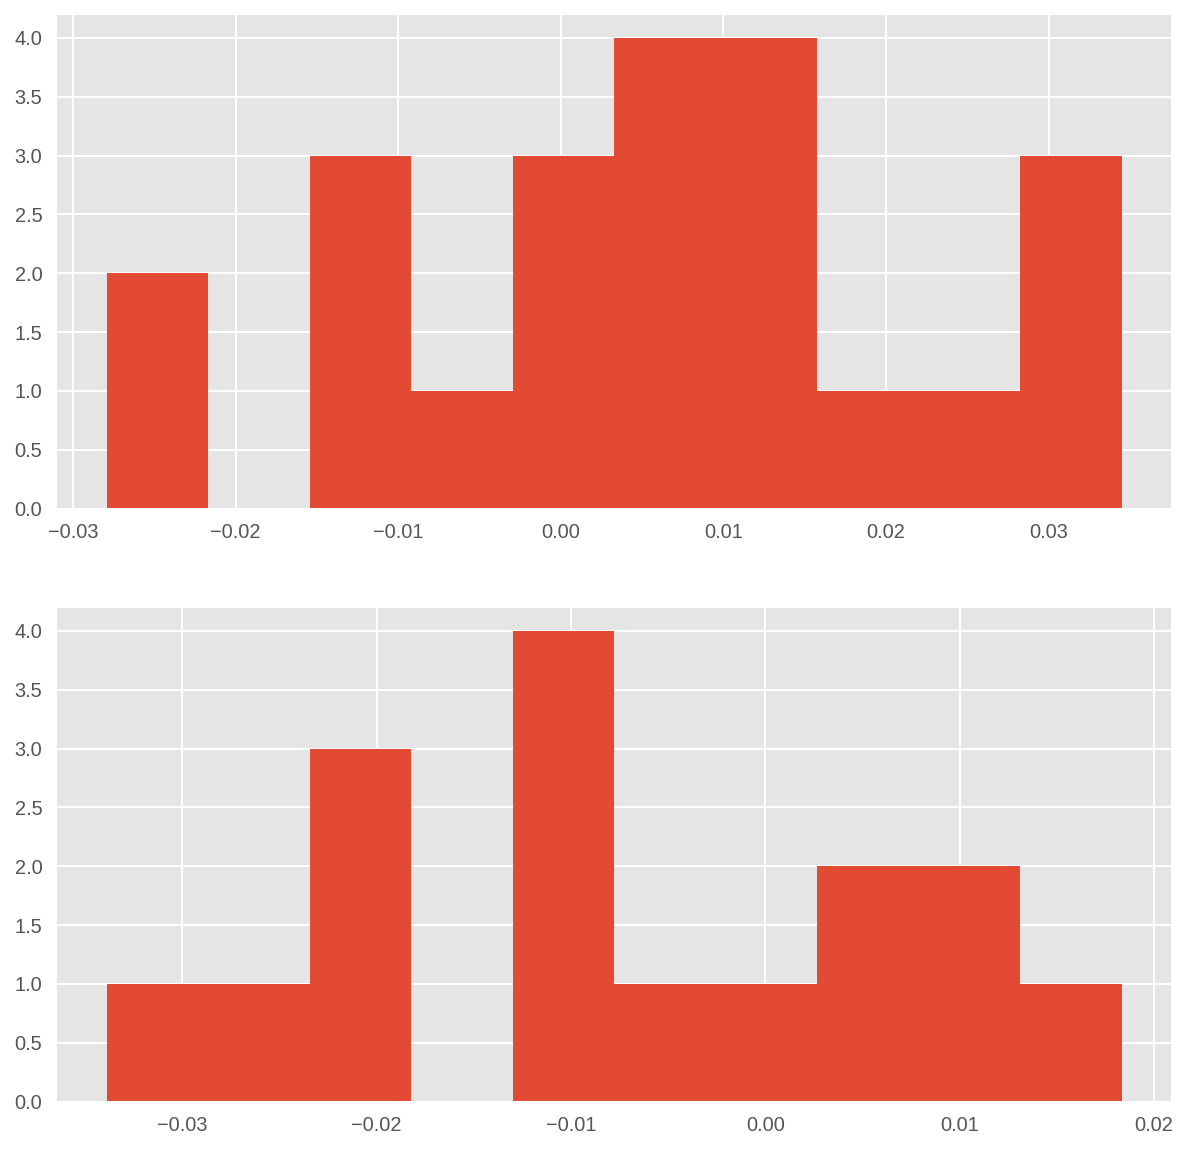

In [32]:
# Distribution relative to the cue

x1 = ocl_fix_reach['distance_to']
x2 = onl_fix_reach['distance_to']

fig = plt.figure(figsize = [10, 10])
ax1 = fig.add_subplot(211)
ax1.hist(x1, bins = 10)
ax2 = fig.add_subplot(212, sharey = ax1)
ax2.hist(x2, bins = 10)
plt.show()

### Fixations' duration

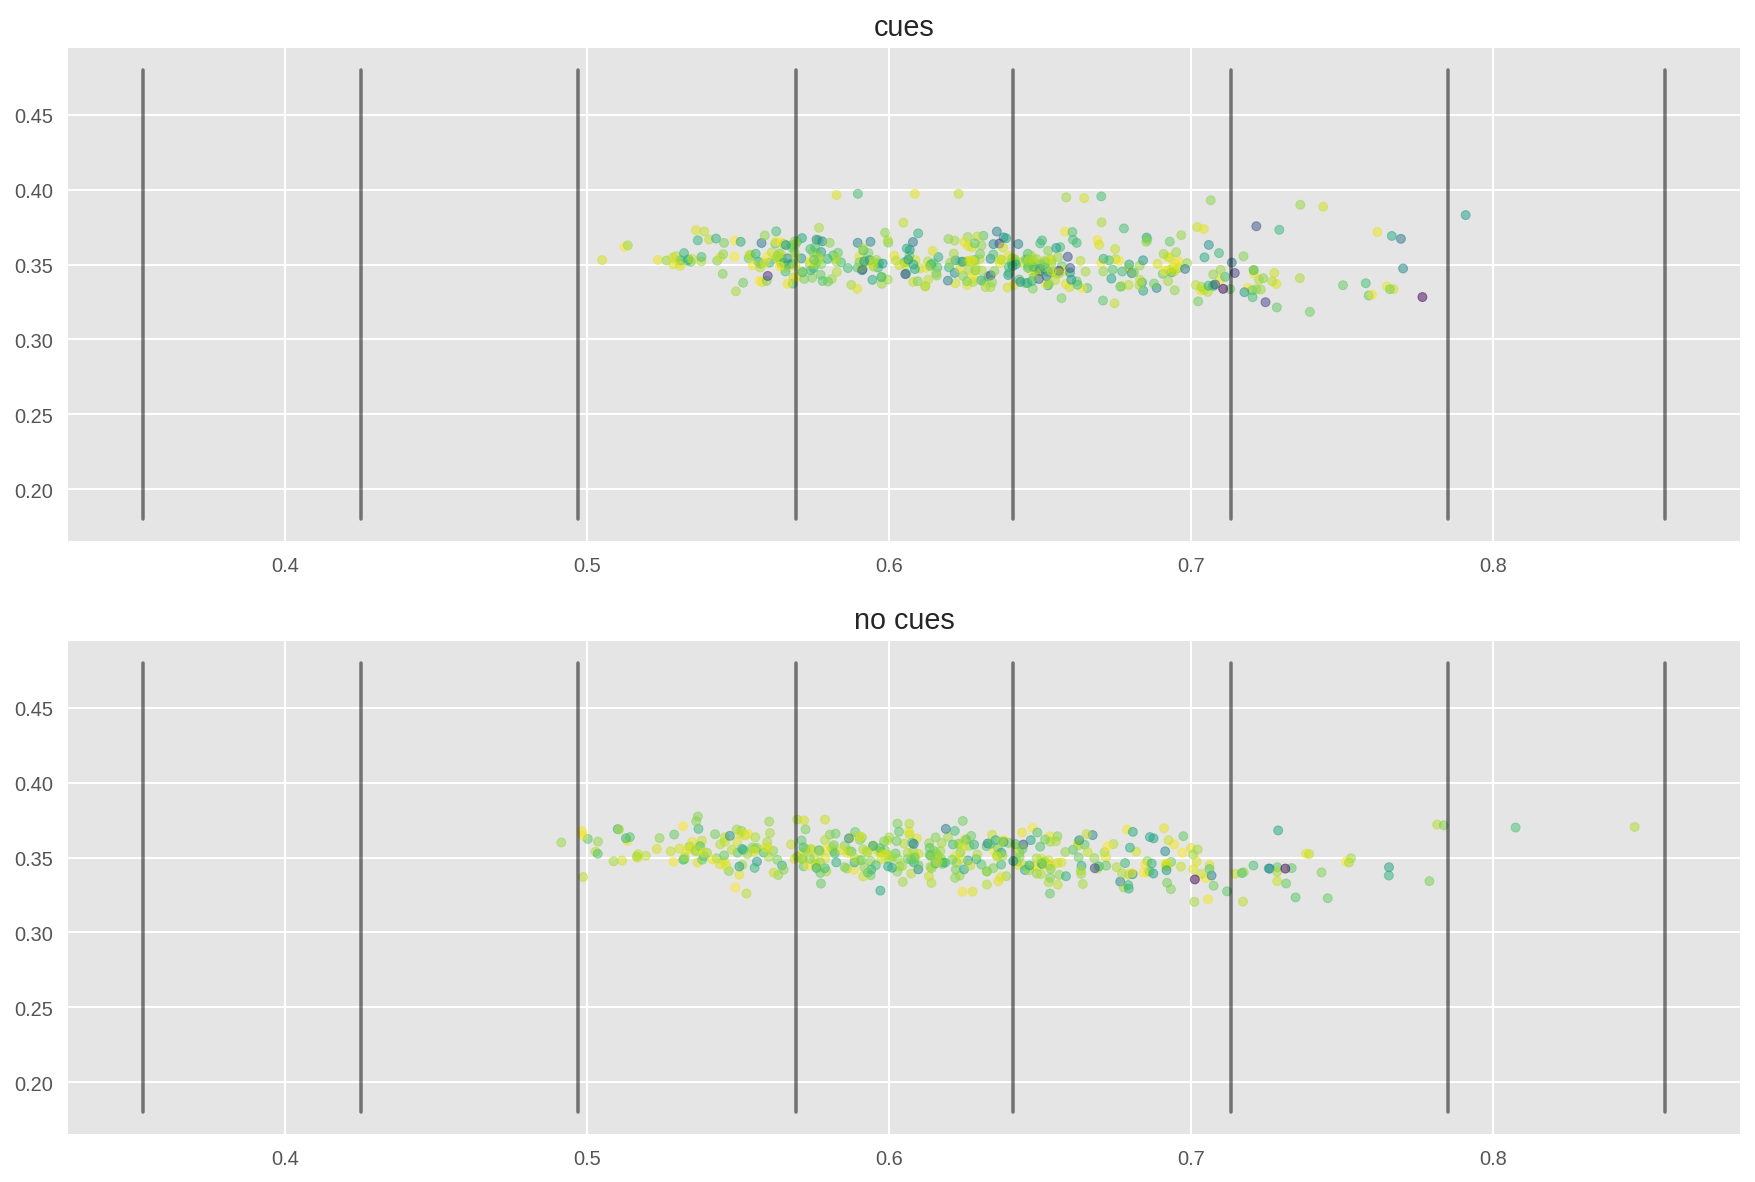

In [33]:
from matplotlib import cm

fig = plt.figure(figsize = [15, 10])
ax1 = fig.add_subplot(211)
draw_cues(ax1, ybottom = 0.18, ytop = 0.48)
ax1.scatter(ocl_fixations['centre_x'], ocl_fixations['centre_z'], c = ocl_fixations['duration'],
            alpha = 0.5, cmap = cm.viridis_r, s = 20)
ax1.set_title('cues')
# ax1.set_xlim(0.5, 0.8)
# ax1.set_ylim(0.3, 0.4)

ax2 = fig.add_subplot(212)
draw_cues(ax2, ybottom = 0.18, ytop = 0.48)
ax2.scatter(onl_fixations['centre_x'], onl_fixations['centre_z'], c = onl_fixations['duration'],
            alpha = 0.5, cmap = cm.viridis_r, s = 20)
ax2.set_title('no cues')

plt.show()

r = -0.089
p = 0.058


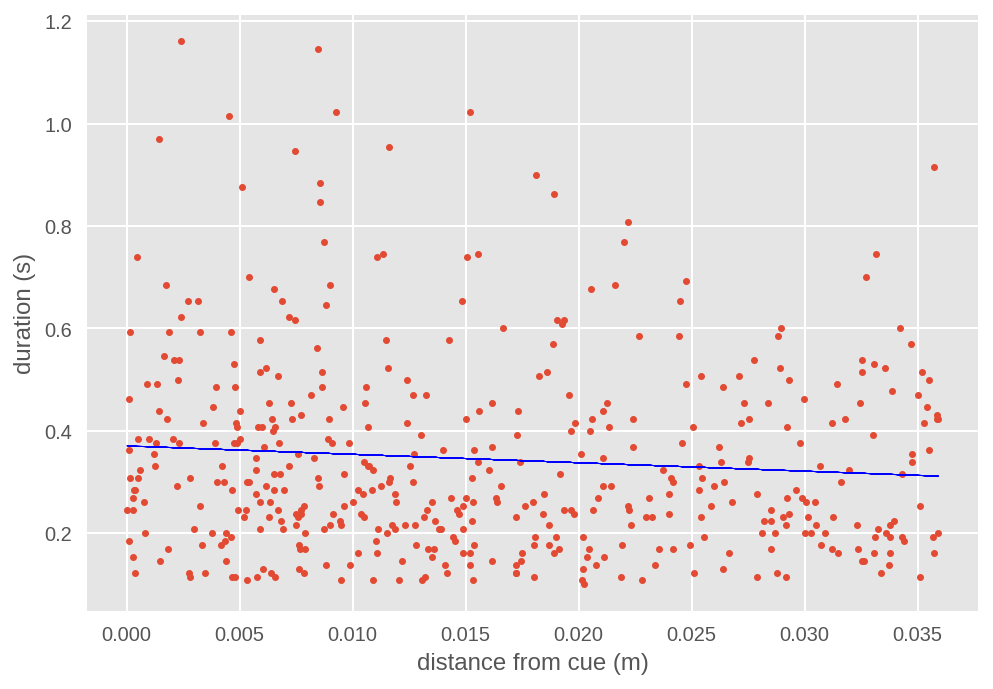

In [34]:
# Linear model duration ~ distance for ocl

from scipy.stats import linregress

slope, intercept, r, p, stderr = linregress(abs(ocl_fixations['distance_to']), ocl_fixations['duration'])
print 'r = {}\np = {}'.format(round(r, 3), round(p, 3))
y = slope * abs(ocl_fixations['distance_to']) + intercept

plt.plot(abs(ocl_fixations['distance_to']), ocl_fixations['duration'], '.')
plt.plot(abs(ocl_fixations['distance_to']), y, 'b-', linewidth = 0.5)
plt.xlabel('distance from cue (m)')
plt.ylabel('duration (s)')
plt.show()

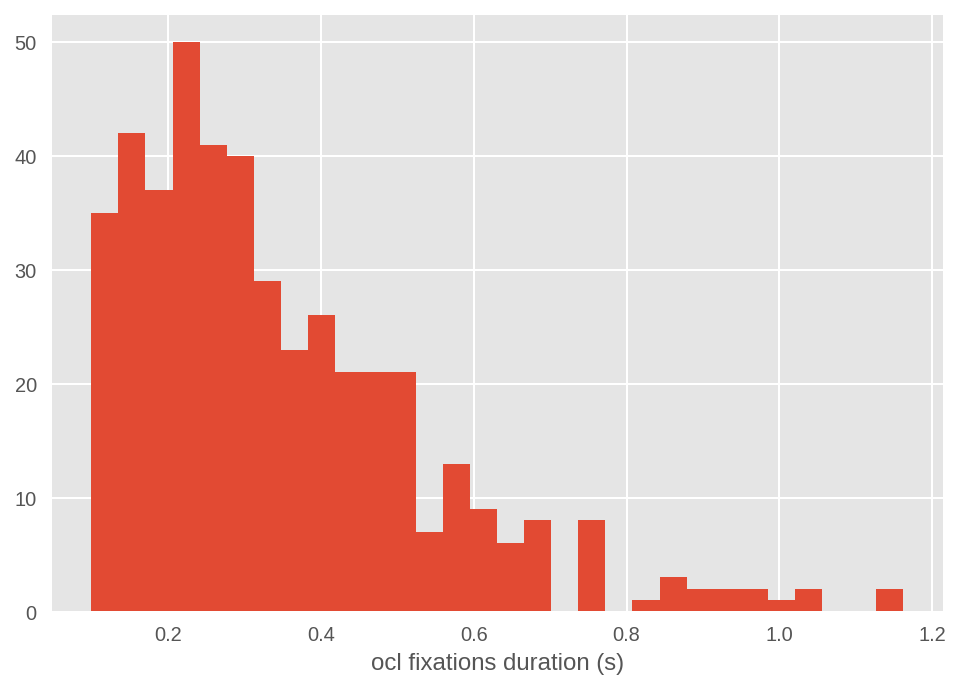

In [35]:
# Distribution of fixations' duration

plt.hist(ocl_fixations['duration'], bins = 30)
plt.xlabel('ocl fixations duration (s)')
plt.show()

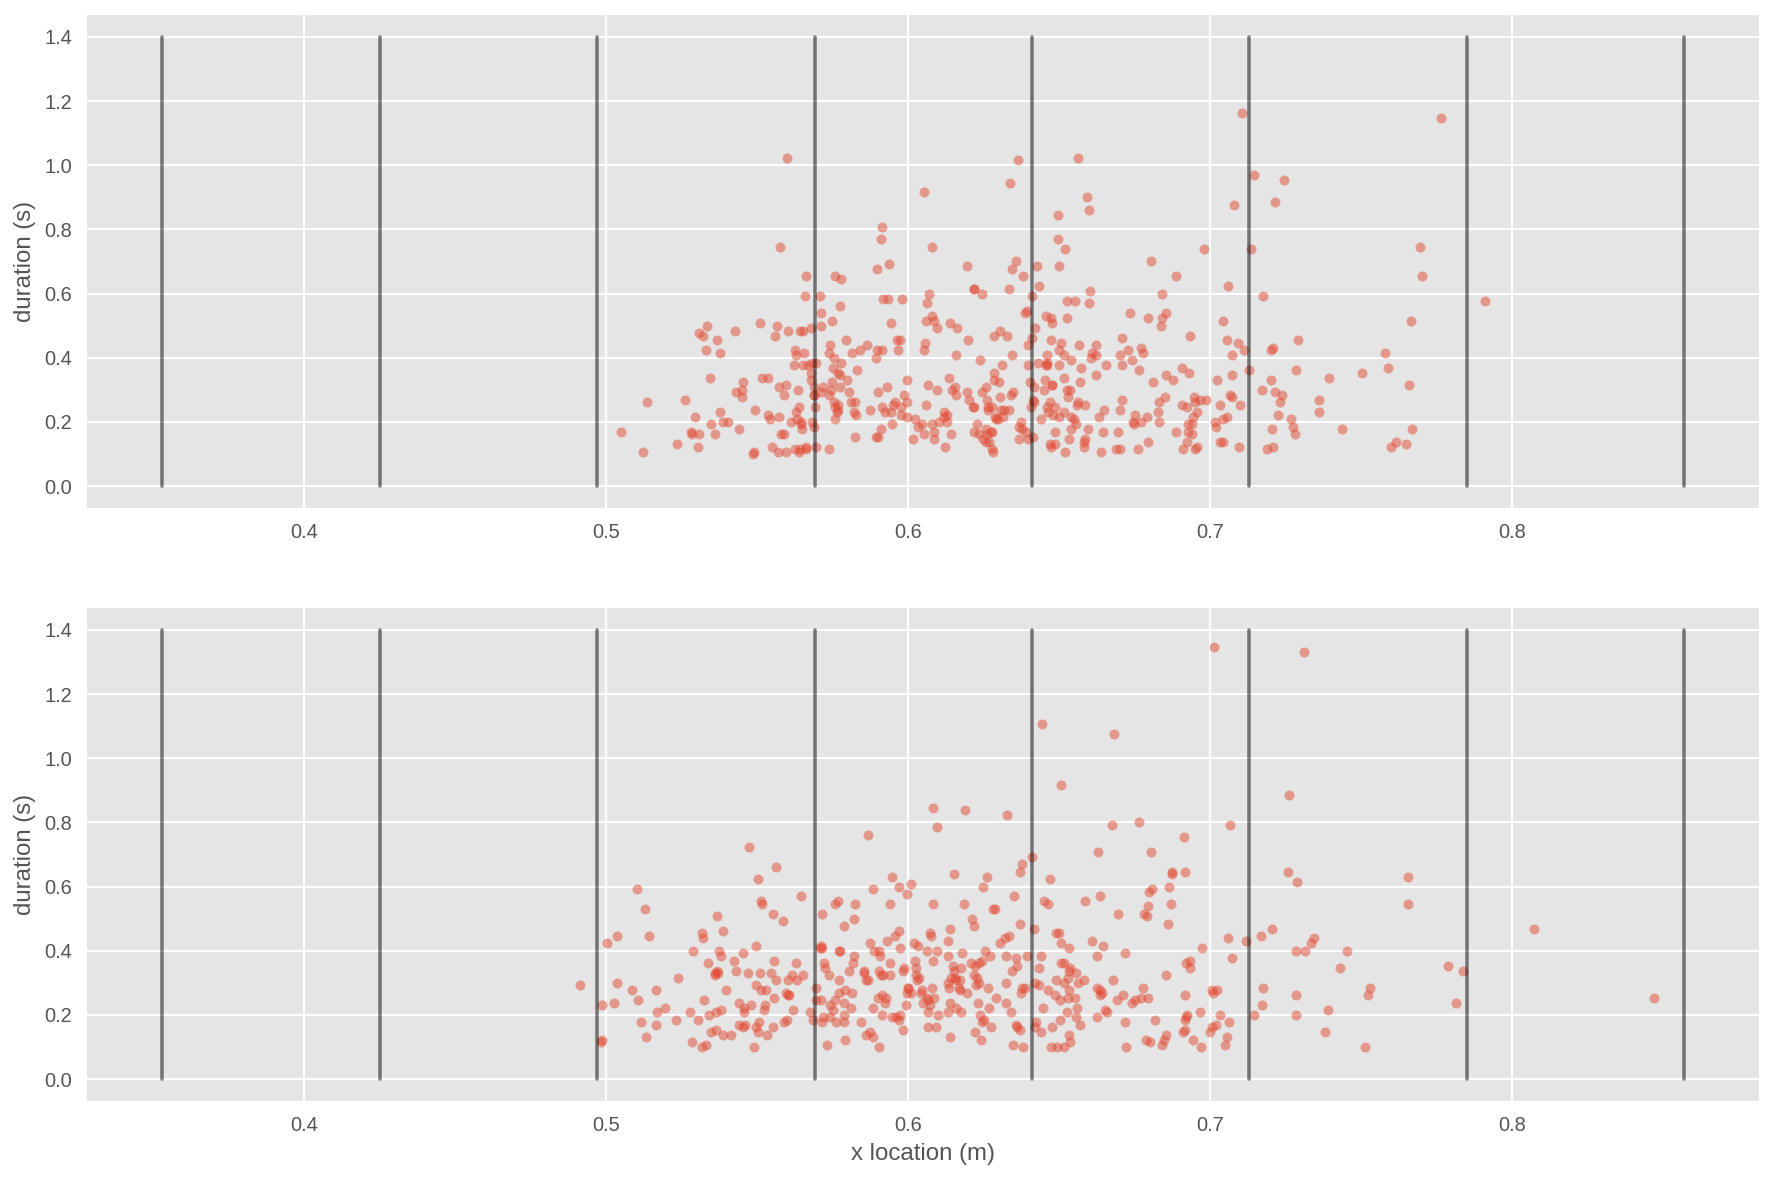

In [36]:
# Fixation duration against location on the x-axis

fig = plt.figure(figsize = [15, 10])

ax1 = fig.add_subplot(211)
ax1.plot(ocl_fixations['centre_x'], ocl_fixations['duration'], '.', markersize = 10, alpha = 0.5)
draw_cues(ax1, ybottom = 0, ytop = 1.4)
ax1.set_ylabel('duration (s)')

ax2 = fig.add_subplot(212, sharex = ax1, sharey = ax1)
ax2.plot(onl_fixations['centre_x'], onl_fixations['duration'], '.', markersize = 10, alpha = 0.5)
draw_cues(ax2, ybottom = 0, ytop = 1.4)
ax2.set_xlabel('x location (m)')
ax2.set_ylabel('duration (s)')

plt.show()

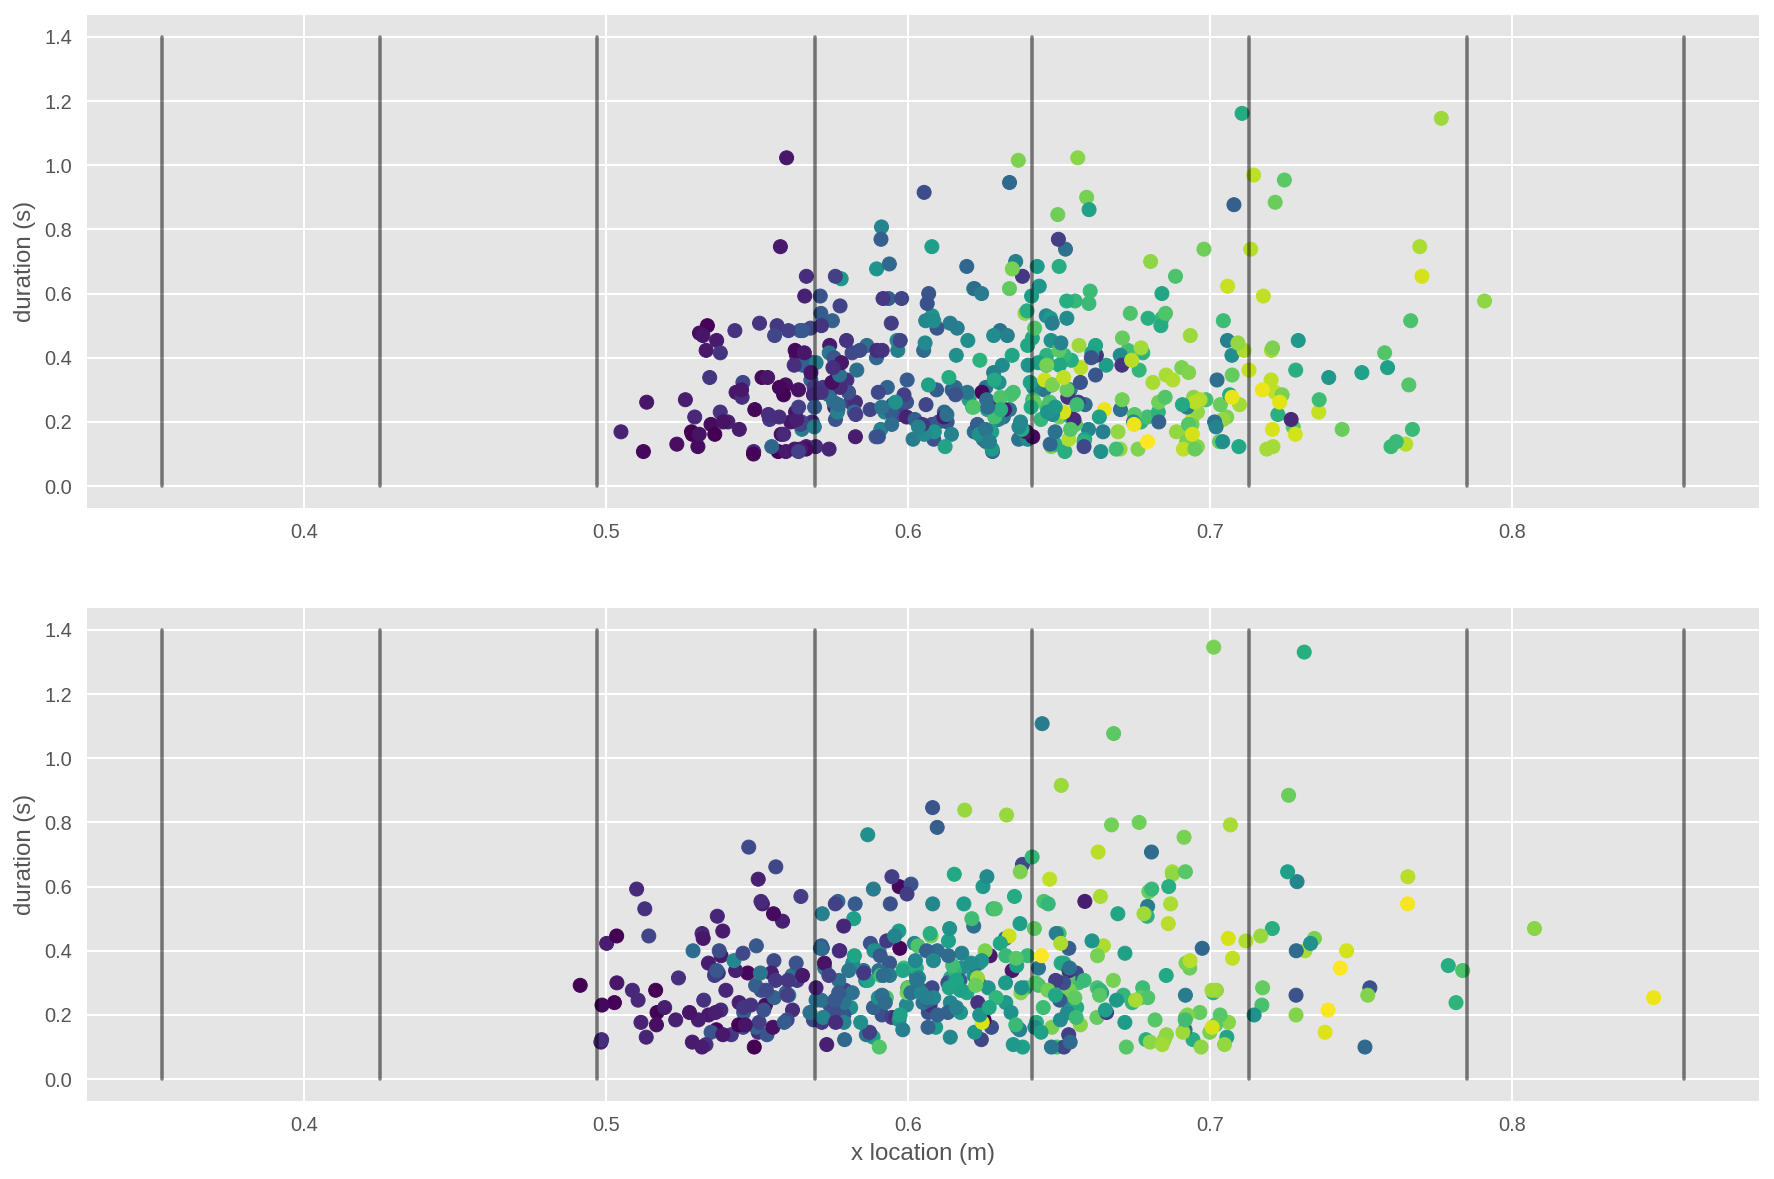

In [37]:
fig = plt.figure(figsize = [15, 10])

ax1 = fig.add_subplot(211)
ax1.scatter(ocl_fixations['centre_x'], ocl_fixations['duration'], c = ocl_fixations['start_frame'], cmap = cm.viridis)
draw_cues(ax1, ybottom = 0, ytop = 1.4)
ax1.set_ylabel('duration (s)')

ax2 = fig.add_subplot(212, sharex = ax1, sharey = ax1)
ax2.scatter(onl_fixations['centre_x'], onl_fixations['duration'], c = onl_fixations['start_frame'], cmap = cm.viridis)
draw_cues(ax2, ybottom = 0, ytop = 1.4)
ax2.set_xlabel('x location (m)')
ax2.set_ylabel('duration (s)')

plt.show()

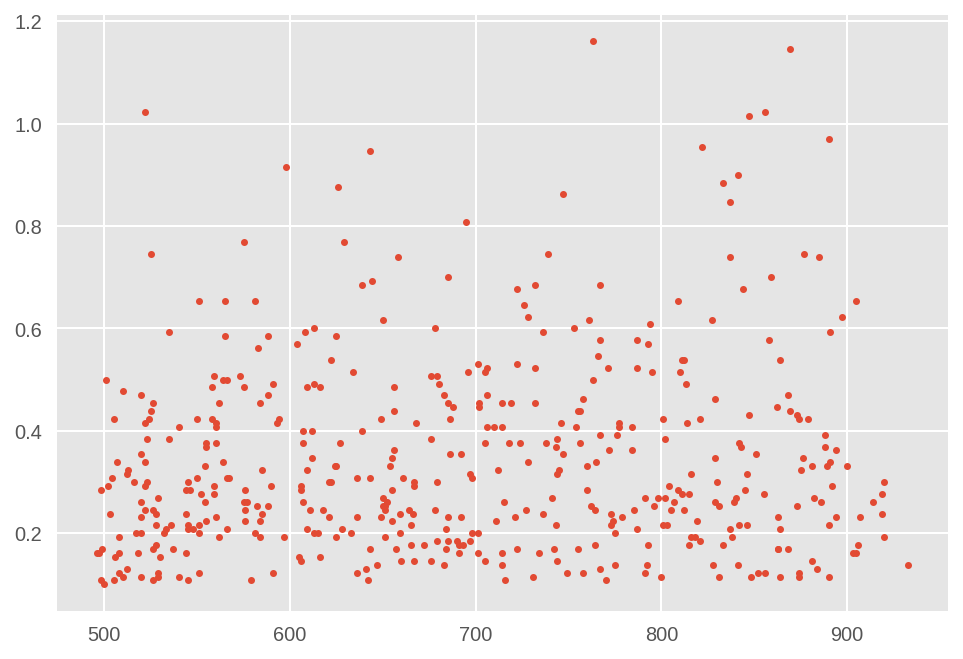

In [38]:
plt.plot(ocl_fixations['start_frame'], ocl_fixations['duration'], '.')
plt.show()

## Reaching movement

In [39]:
def auc(x, y, z):
    vel = np.sqrt(np.diff(x)**2 + np.diff(y)**2 + np.diff(z)**2) # in m/frame. divide by sampling freq to get m/s
    d = sum(vel)
    return d

In [40]:
# Find the reach travel distance for wrist

td = pd.DataFrame(columns = ['participant', 'condition', 'travel_distance'])

for pid, subj in d.items():
    for trial in subj['trials'].values():
        
        x = trial[markers[pid]['wrist'] + 'x']
        y = trial[markers[pid]['wrist'] + 'y']
        z = trial[markers[pid]['wrist'] + 'z']
        
        dist = auc(x, y, z)
        cond = trial['name'][6:-4]
        
        to_add = pd.Series([pid, cond, dist], td.columns.values.tolist())
        td = td.append(to_add, ignore_index = True)
        
td[:5]

participant                  condition  travel_distance
0         P11  Visible_NoCue_RightToLeft         0.451970
1         P11  Visible_NoCue_RightToLeft         0.455537
2         P11  Visible_NoCue_LeftToRight         0.404022
3         P11  Visible_NoCue_LeftToRight         0.400822
4         P11  Visible_NoCue_LeftToRight         0.389036

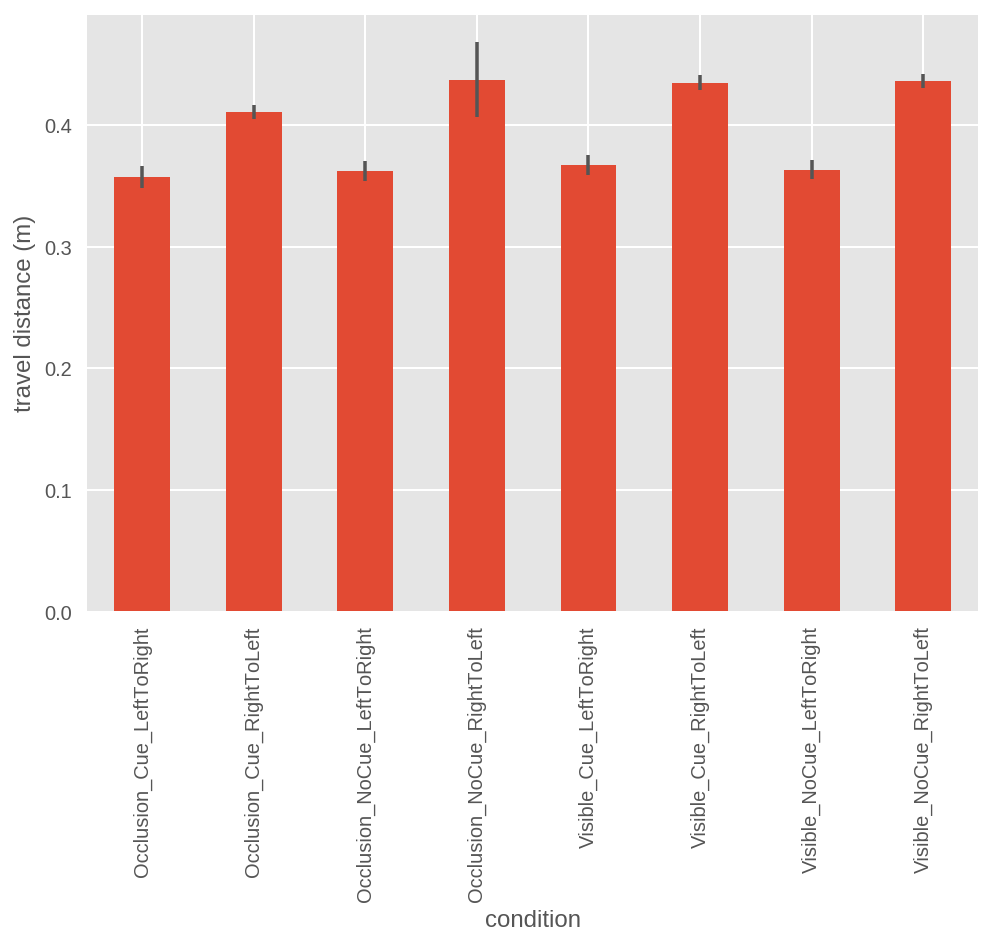

In [41]:
a = td.groupby(['participant', 'condition']).aggregate(np.mean).reset_index()
b = a.pivot(index = 'participant', columns = 'condition', values = 'travel_distance')
c = b.mean(axis = 0)
# b.loc[:, ['Occlusion_Cue_LeftToRight', 'Visible_Cue_LeftToRight']].plot(kind = 'bar')
c.plot(kind = 'bar',  yerr = b.std(axis = 0) / np.sqrt(len(b)))
plt.ylabel('travel distance (m)')
plt.show()

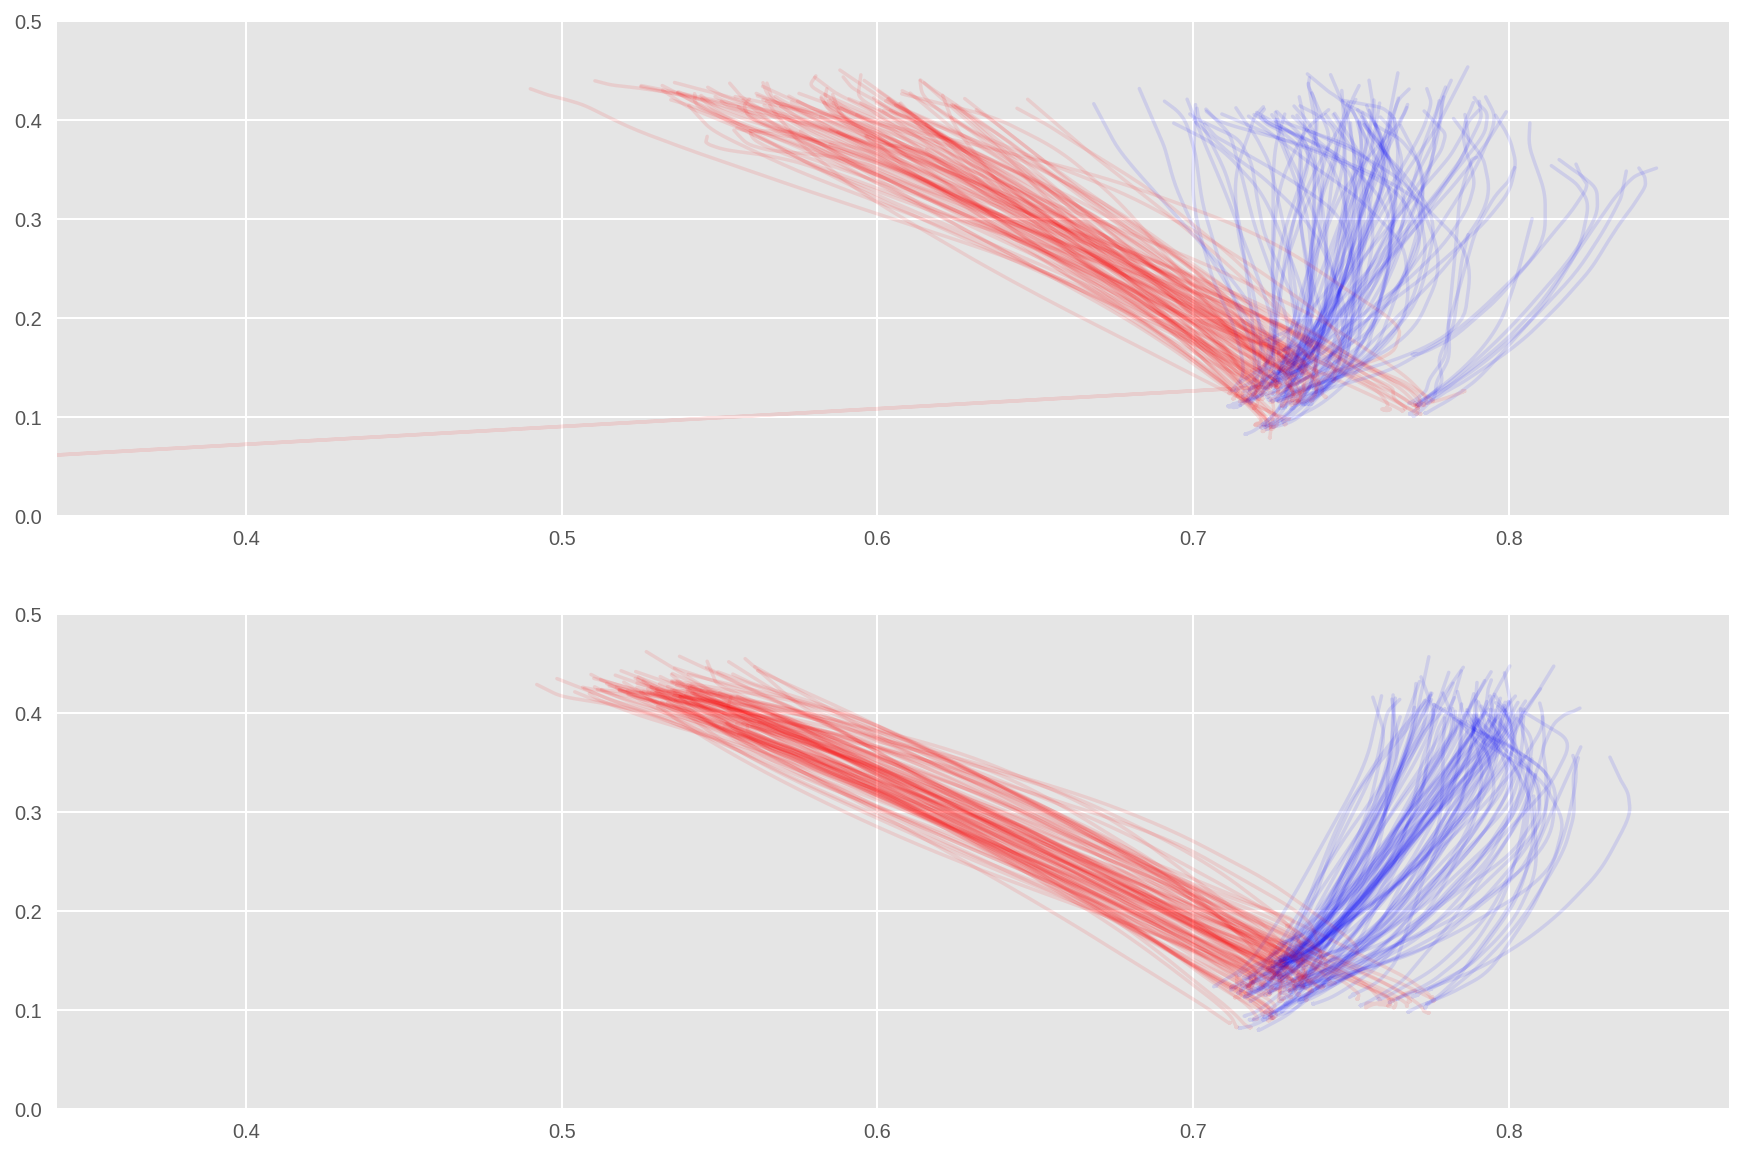

In [42]:
# Reach trajectories on x-y axes for wrist

fig = plt.figure(figsize = [15, 10])
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

for pid, subj in d.items():
    for trial in subj['trials'].values():
        x = trial[markers[pid]['wrist'] + 'x']
        y = trial[markers[pid]['wrist'] + 'y']
        if 'Occlusion_Cue_LeftToRight' in trial['name'] or 'Occlusion_NoCue_LeftToRight' in trial['name']:
            ax1.plot(x, y, color = 'b', alpha = 0.1)
        elif 'Occlusion_Cue_RightToLeft' in trial['name'] or 'Occlusion_NoCue_RightToLeft' in trial['name']:
            ax1.plot(x, y, color = 'r', alpha = 0.1)
        elif 'Visible_Cue_LeftToRight' in trial['name'] or 'Visible_NoCue_LeftToRight' in trial['name']:
            ax2.plot(x, y, color = 'b', alpha = 0.1)
        elif 'Visible_Cue_RightToLeft' in trial['name'] or 'Visible_NoCue_RightToLeft' in trial['name']:
            ax2.plot(x, y, color = 'r', alpha = 0.1)

ax1.set_ylim(0, 0.5)
ax2.set_ylim(0, 0.5)
ax1.set_xlim(0.34, 0.87)
ax2.set_xlim(0.34, 0.87)
plt.show()

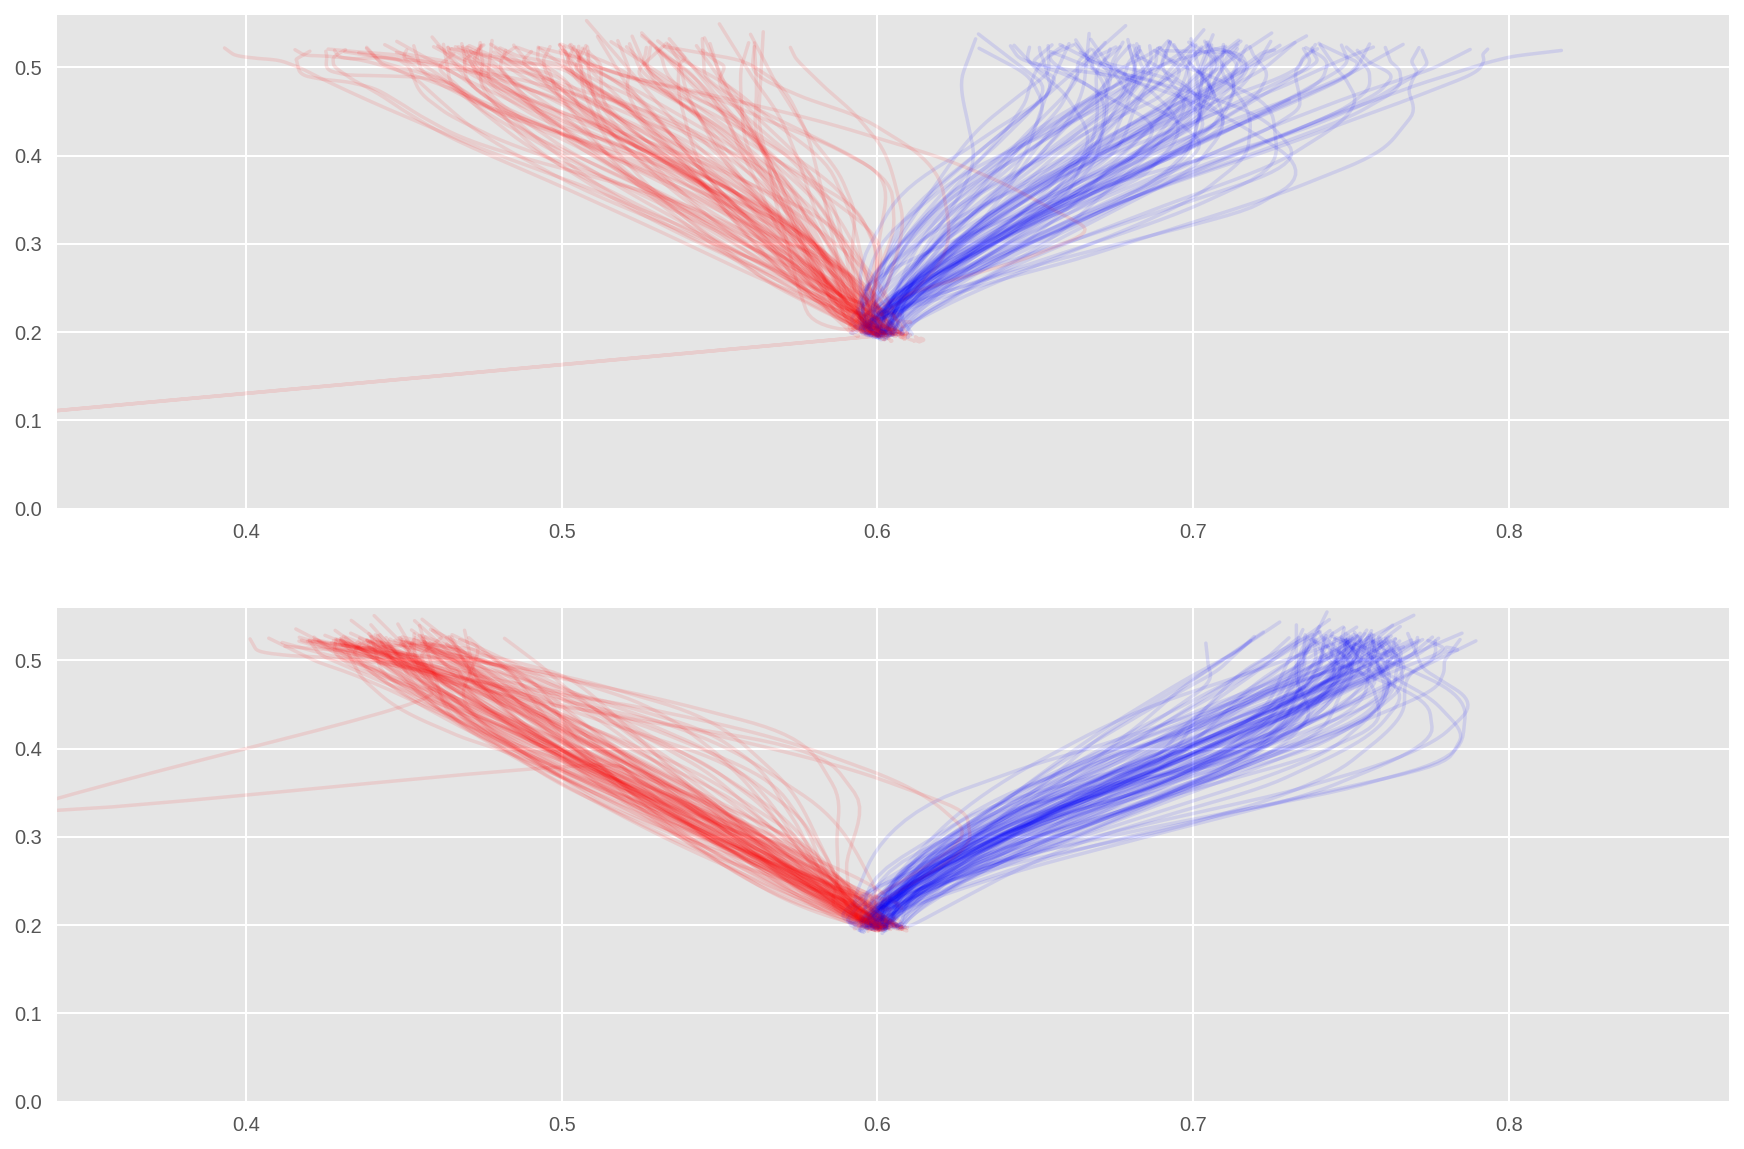

In [43]:
# Reach trajectories on x-y axes for index

fig = plt.figure(figsize = [15, 10])
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

for pid, subj in d.items():
    for trial in subj['trials'].values():
        x = trial[markers[pid]['index'] + 'x']
        y = trial[markers[pid]['index'] + 'y']
        if 'Occlusion_Cue_LeftToRight' in trial['name'] or 'Occlusion_NoCue_LeftToRight' in trial['name']:
            ax1.plot(x, y, color = 'b', alpha = 0.1)
        elif 'Occlusion_Cue_RightToLeft' in trial['name'] or 'Occlusion_NoCue_RightToLeft' in trial['name']:
            ax1.plot(x, y, color = 'r', alpha = 0.1)
        elif 'Visible_Cue_LeftToRight' in trial['name'] or 'Visible_NoCue_LeftToRight' in trial['name']:
            ax2.plot(x, y, color = 'b', alpha = 0.1)
        elif 'Visible_Cue_RightToLeft' in trial['name'] or 'Visible_NoCue_RightToLeft' in trial['name']:
            ax2.plot(x, y, color = 'r', alpha = 0.1)

ax1.set_ylim(0, 0.56)
ax2.set_ylim(0, 0.56)
ax1.set_xlim(0.34, 0.87)
ax2.set_xlim(0.34, 0.87)
plt.show()

In [44]:
# Get the index accuracy and mean distance of fixations table

mean_fixations = fixations.groupby(['p', 'trial'])['distance_to'] \
                          .apply(lambda x: np.mean(np.abs(x))) \
                          .reset_index()
        
# mean_fixations = fixations.groupby(['p', 'trial'])['distance_to'] \
#                           .apply(lambda x: np.mean(x)) \
#                           .reset_index()

In [45]:
common = pd.merge(mean_fixations, accuracies, on = ['p', 'trial'])
display(common[:10])

ocl = common[common['condition'] == 'Occlusion_Cue_LeftToRight']
onl = common[common['condition'] == 'Occlusion_NoCue_LeftToRight']

p trial  distance_to                    condition  eyes_object_final  \
0  P07    t1     0.017805    Occlusion_Cue_LeftToRight          -0.096329   
1  P07   t10     0.012794    Occlusion_Cue_RightToLeft          -0.058725   
2  P07   t11     0.014703    Occlusion_Cue_RightToLeft          -0.075704   
3  P07   t12     0.016460    Occlusion_Cue_RightToLeft          -0.090795   
4  P07   t13     0.021122  Occlusion_NoCue_LeftToRight          -0.007270   
5  P07   t15     0.021613  Occlusion_NoCue_LeftToRight          -0.099761   
6  P07   t16     0.018427  Occlusion_NoCue_LeftToRight          -0.057885   
7  P07   t17     0.017600  Occlusion_NoCue_LeftToRight          -0.054586   
8  P07   t18     0.018002  Occlusion_NoCue_LeftToRight          -0.056217   
9  P07   t19     0.018782  Occlusion_NoCue_RightToLeft          -0.052930   

   eyes_object_ro  index_object  peak_vel  reach_duration  reaction  ro_frame  \
0       -0.062740     -0.062737     975.0            63.0      64.0     944.0   
1       -0.024311     -0.059111     978.0            71.0      60.0     940.0   
2       -0.030204     -0.073226     975.0            92.0      56.0     936.0   
3       -0.045553     -0.071911     992.0           107.0      66.0     946.0   
4        0.008044     -0.009502     963.0            72.0      42.0     922.0   
5       -0.065825     -0.094429     958.0            91.0      41.0     921.0   
6       -0.042634     -0.040204     972.0            94.0      48.0     928.0   
7       -0.017586     -0.060545     955.0            75.0      47.0     927.0   
8       -0.028486     -0.073183     975.0            91.0      49.0     929.0   
9        0.000871     -0.055344     980.0           102.0      59.0     939.0   

   wrist_decel  
0         32.0  
1         33.0  
2         53.0  
3         61.0  
4         31.0  
5         54.0  
6         50.0  
7         47.0  
8         45.0  
9         61.0

r = -0.05
p = 0.755


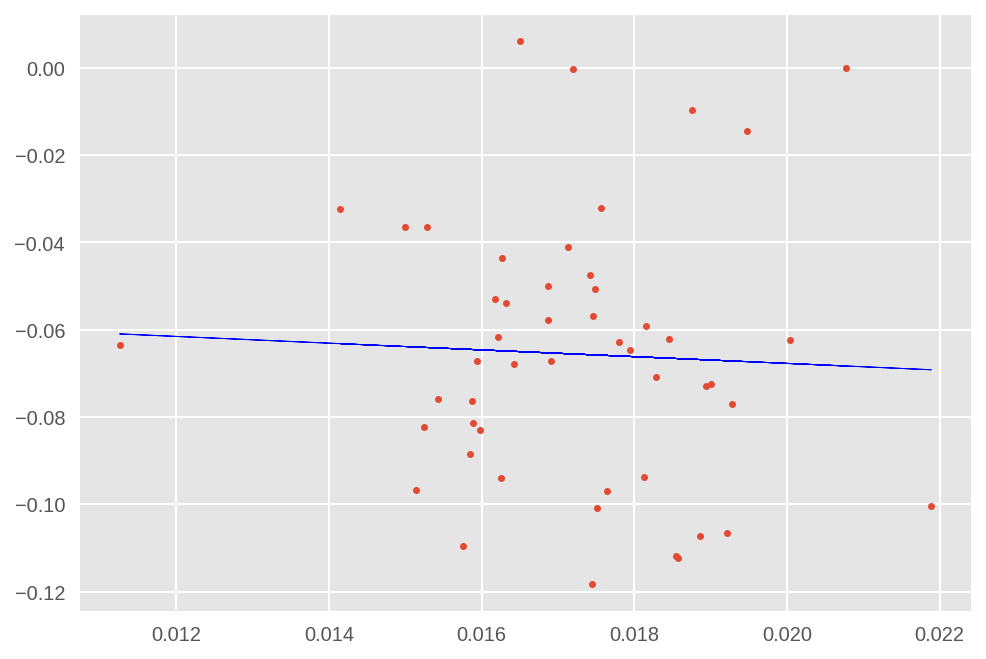

In [46]:
# Linear model grasp-obj distance ~ fixation-cue distance during pursuit

slope, intercept, r, p, stderr = linregress(ocl['distance_to'], ocl['index_object'])
print 'r = {}\np = {}'.format(round(r, 2), round(p, 3))

y = intercept + slope * ocl['distance_to']

plt.plot(ocl['distance_to'], ocl['index_object'], '.')
plt.plot(ocl['distance_to'], y, 'b-', linewidth = 0.5)
plt.show()

r = 0.09
p = 0.521


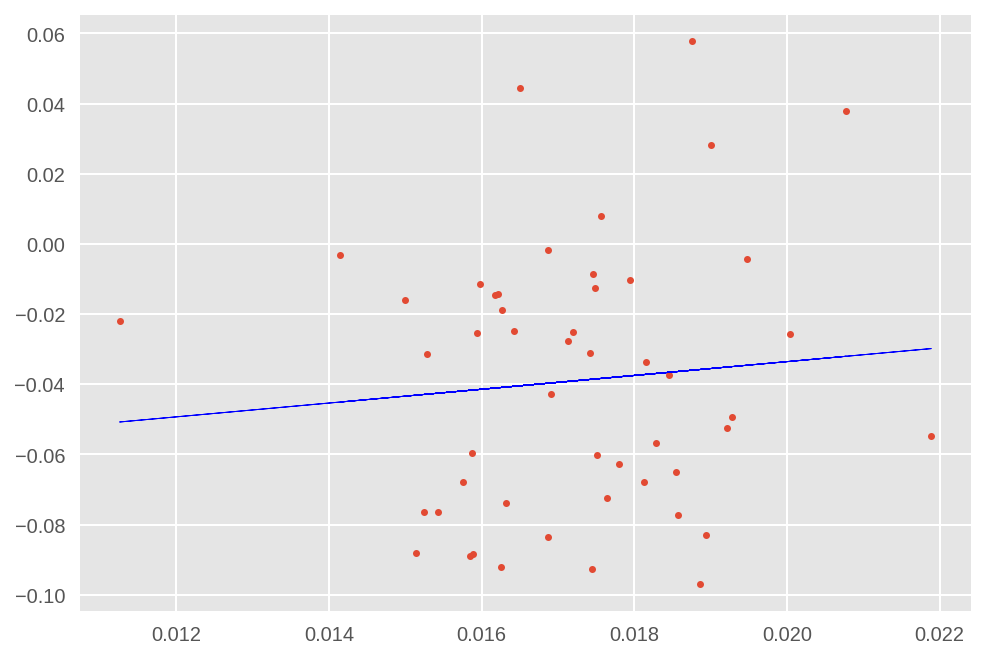

In [47]:
# Linear model gaze-obj distance at the reach onset ~ distance to cues during pursuit

slope, intercept, r, p, stderr = linregress(ocl['distance_to'], ocl['eyes_object_ro'])
print 'r = {}\np = {}'.format(round(r, 2), round(p, 3))

y = intercept + slope * ocl['distance_to']

plt.plot(ocl['distance_to'], ocl['eyes_object_ro'], '.')
plt.plot(ocl['distance_to'], y, 'b-', linewidth = 0.5)
plt.show()

## Root mean square error

In [48]:
def rmse(error):
    if not isinstance(error, np.ndarray):
        error = np.array(error)
    x = np.sqrt(np.mean(error**2))
    return x

In [49]:
rmse_data = pd.DataFrame()
error_vectors = {}

for pid, subj in d.items():
    error_vectors[pid] = {}
    for tid, trial in subj['trials'].items():
        ro_frame = np.where(np.array(trial['startmovement']) == 1)[0][0]
        error = np.array(trial['averagexeye'][496:ro_frame]) - np.array(trial['objectx'][496:ro_frame])
        
        error_vectors[pid][tid] = {}
        error_vectors[pid][tid]['condition'] = trial['name'][6:-4]
        error_vectors[pid][tid]['error'] = error
        
        to_add = pd.Series()
        to_add['p'] = pid
        to_add['trial'] = tid
        to_add['condition'] = trial['name'][6:-4]
        to_add['rmse'] = rmse(error)
        
        rmse_data = rmse_data.append(to_add, ignore_index = True)

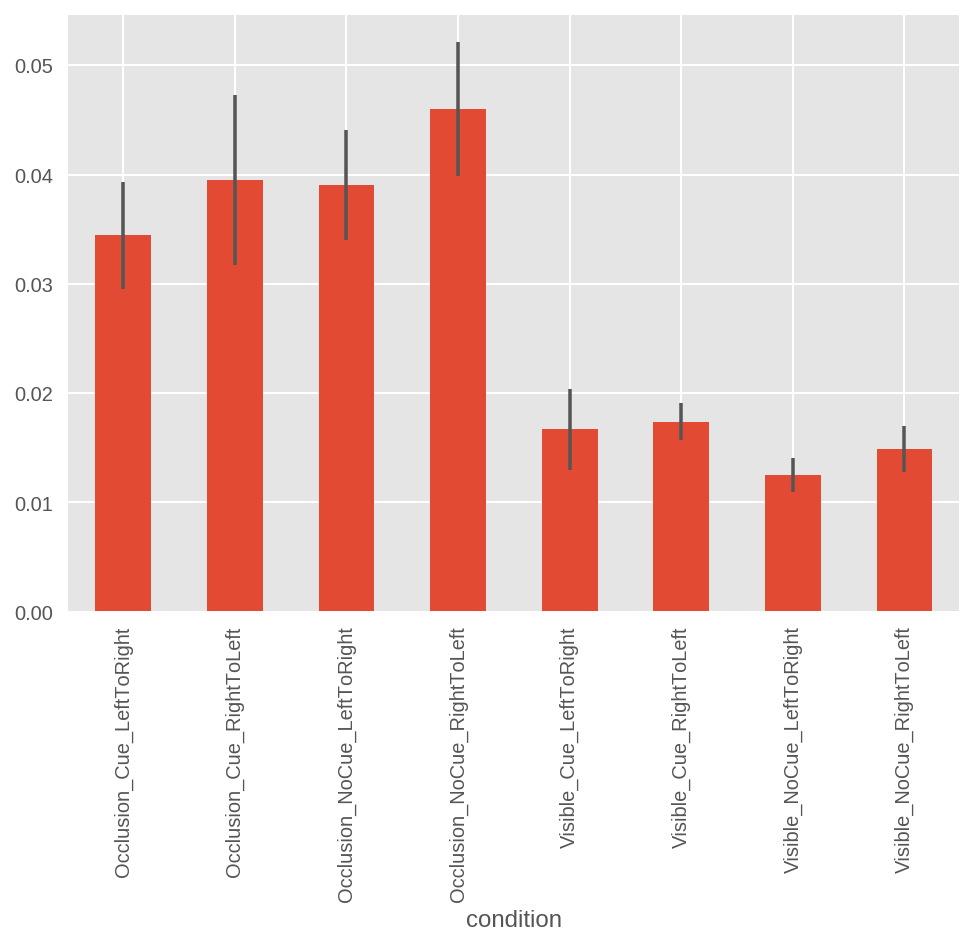

In [50]:
average_rmse = rmse_data.groupby(['p', 'condition'])['rmse'] \
                        .apply(np.mean) \
                        .reset_index() \
                        .pivot(index = 'p', columns = 'condition', values = 'rmse')
average_rmse.apply(np.mean).plot(kind = 'bar', yerr = np.std(average_rmse) / np.sqrt(len(average_rmse)))
plt.show()

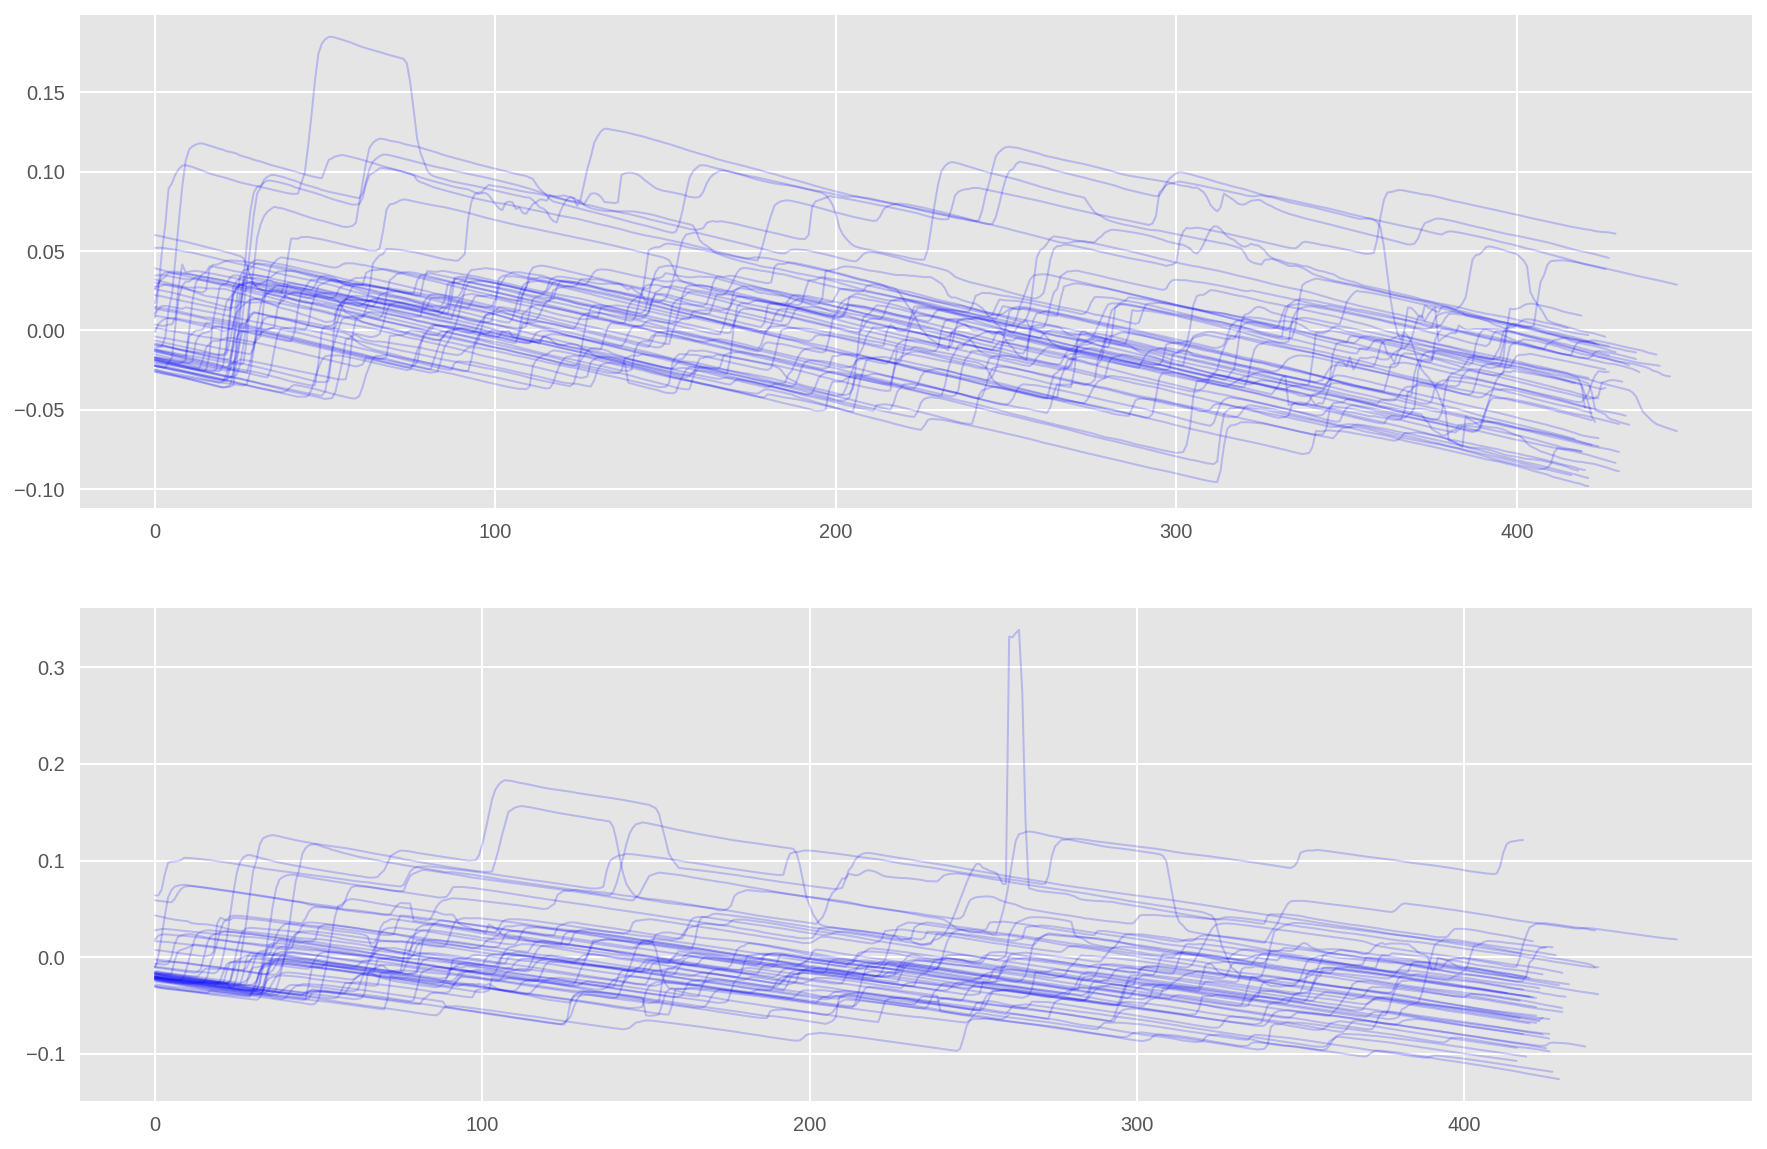

In [51]:
fig = plt.figure(figsize = [15,10])
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

for p in error_vectors.values():
    for t in p.values():
        if 'Occlusion_Cue_LeftToRight' in t['condition']:
            ax1.plot(t['error'], 'b-', alpha = 0.2, linewidth = 1)
        elif 'Occlusion_NoCue_LeftToRight' in t['condition']:
            ax2.plot(t['error'], 'b-', alpha = 0.2, linewidth = 1)

plt.show()

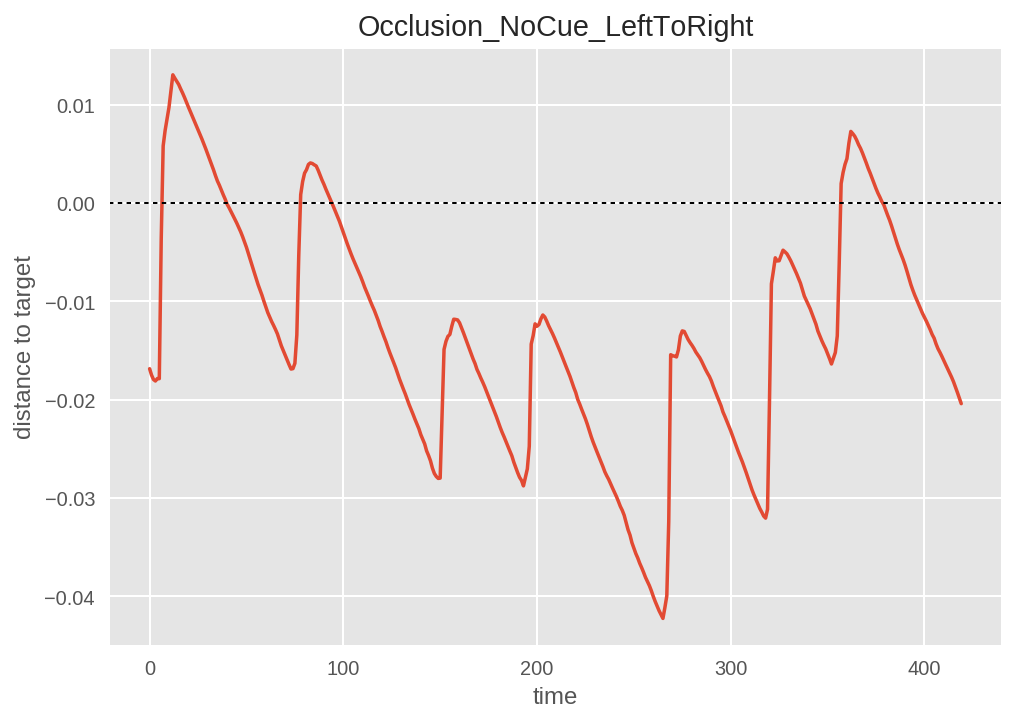

In [52]:
plt.plot(error_vectors['P12']['t16']['error'])
plt.title(error_vectors['P12']['t16']['condition'])
plt.axhline(0, color = 'k', linestyle = ':', linewidth = 1)
plt.xlabel('time')
plt.ylabel('distance to target')
plt.show()

## Saccades

In [53]:
saccades = pd.DataFrame()

for pid, subj in d.items():
    for tid, trial in subj['trials'].items():
                
        to_add = pd.DataFrame()
        
        ro_frame = np.where(np.array(trial['startmovement']) == 1)[0][0]
        
        ti = [] # time interval
        for frame in trial['fix']['start_frame'][1:]:
            if frame < 495:
                ti.append(0)
            elif 495 <= frame < ro_frame:
                ti.append(1)
            elif frame >= ro_frame:
                ti.append(2)
        
        to_add['ampl'] = np.absolute(np.diff(trial['fix']['centre_x']))
        to_add['ro_frame'] = ro_frame
        to_add['time_interval'] = ti
        
        to_add['p'] = pid
        to_add['condition'] = trial['name'][6:-4]
        to_add['trial'] = tid
        
        saccades = saccades.append(to_add, ignore_index = True)

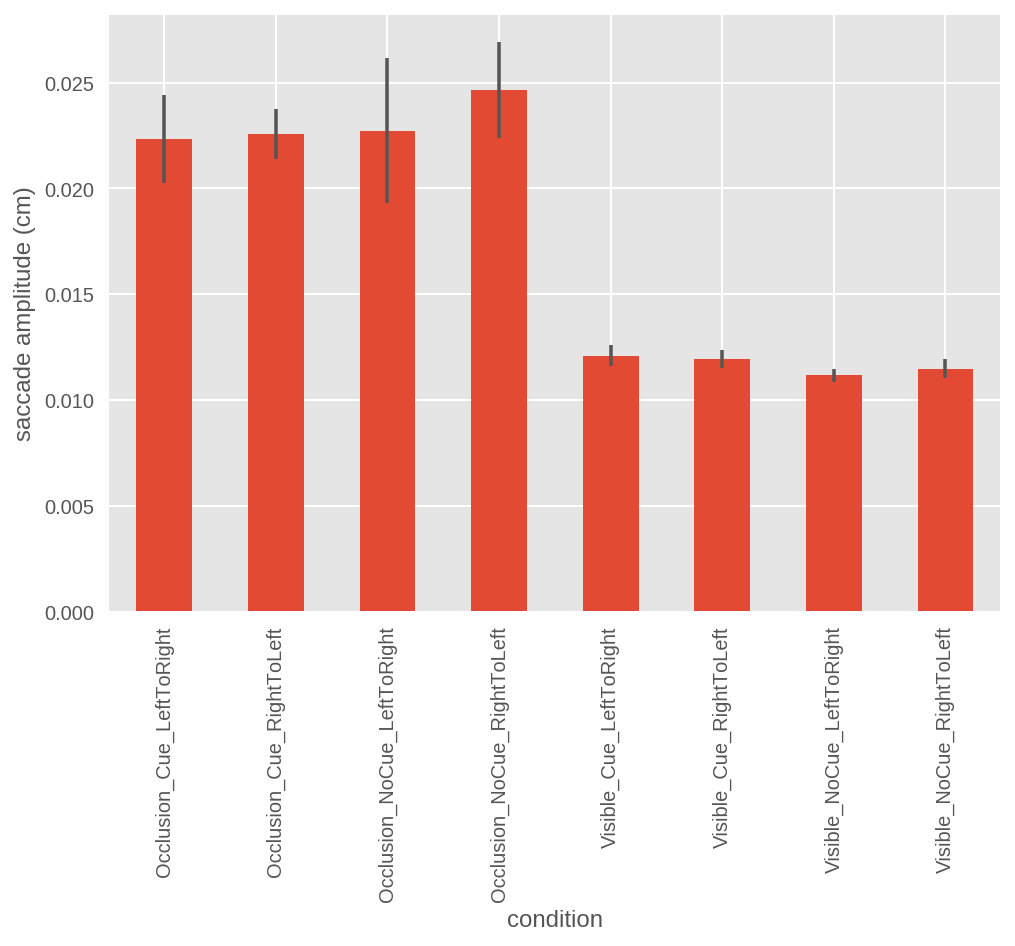

In [54]:
avgs = saccades[saccades.time_interval == 1] \
        .groupby(['p', 'condition'])['ampl'] \
        .apply(np.mean) \
        .reset_index() \
        .pivot(index = 'p', columns = 'condition', values = 'ampl')
        
avgs.apply(np.mean).plot(kind = 'bar', yerr = avgs.std() / np.sqrt(len(avgs)))
plt.ylabel('saccade amplitude (cm)')
plt.show()

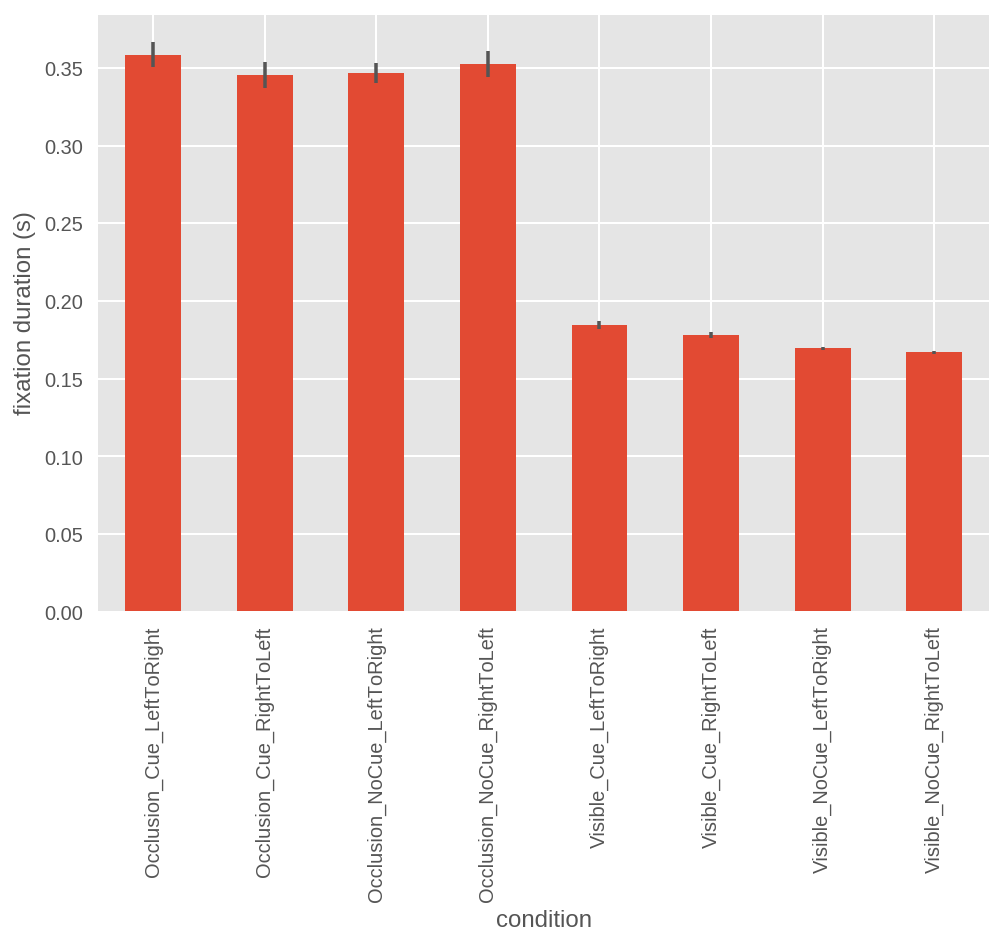

In [55]:
dur_avg = fixations[fixations.time_interval == 1] \
        .groupby(['p', 'condition'])['duration'] \
        .apply(np.mean) \
        .reset_index() \
        .pivot(index = 'p', columns = 'condition', values = 'duration')
dur_avg.apply(np.mean).plot(kind = 'bar', yerr = dur_avg.std() / len(dur_avg))
plt.ylabel('fixation duration (s)')
plt.show()